# Hacktiv8 Phase 1: Milestone 1

---

## Perkenalan

Nama : Salman Faishal

Batch : 017

Dataset : credit_card_default

Objective : Membuat model Classification untuk memprediksi `default_payment_next_month` menggunakan dataset yang sudah disimpan

## Query from Bigquery

```
SELECT limit_balance, 
       CAST(sex AS INT64) AS sex,  
       CAST(education_level AS INT64) AS education_level, 
       CAST(marital_status AS INT64) AS marital_status, 
       age, 
       pay_0, 
       pay_2, 
       pay_3, 
       pay_4, 
       CAST(pay_5 AS FLOAT64) AS pay_5, 
       CAST(pay_6 AS FLOAT64) AS pay_6, 
       bill_amt_1, 
       bill_amt_2, 
       bill_amt_3, 
       bill_amt_4, 
       bill_amt_5, 
       bill_amt_6, 
       pay_amt_1, 
       pay_amt_2, 
       pay_amt_3, 
       pay_amt_4,
       pay_amt_5, 
       pay_amt_6, 
       CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 33983
```

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, roc_curve, roc_auc_score
from feature_engine.outliers import Winsorizer

## Data Loading

In [2]:
# setting untuk menampilkan seluruh kolom
pd.set_option('display.max_column', None)

In [3]:
data = pd.read_csv('h8dsft_P1M1_salman_faishal.csv')

In [4]:
data.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,0,160879,161797,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
5,500000,1,2,1,41,0,0,0,0,0,0,155820,171565,184782,152365,139757,153348,20000,20241,20154,20019,20151,20037,0
6,50000,1,2,1,40,0,0,0,0,0,0,49073,49531,44002,44356,19344,19354,1691,1942,1296,674,693,1000,0
7,100000,1,5,1,45,0,0,0,0,0,0,94502,95697,98222,90500,82586,22620,5000,5000,3203,2103,50000,0,0
8,140000,1,2,1,29,0,0,0,0,0,0,130767,134946,130470,132038,131961,124256,6696,5000,4866,5300,5055,5000,0
9,50000,1,2,1,43,0,0,0,0,0,0,48919,48775,48731,48934,29116,28999,1800,2200,1400,582,580,30000,0


In [5]:
data.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000,2,2,1,28,-1,-1,-1,-1,-2,-2,16666,1000,16666,0,0,0,1000,16666,0,0,0,0,0
2956,200000,2,1,1,49,-1,-1,-1,-1,-2,-2,413,0,103,0,0,0,0,103,0,0,0,225,0
2957,50000,2,1,2,31,-1,0,-1,-1,-1,-2,12725,34526,12787,3995,0,0,30018,12787,3995,0,0,0,0
2958,50000,2,1,2,25,-1,-1,2,-1,-1,-2,13572,17983,15590,10610,0,0,5000,200,10610,0,0,0,0
2959,100000,2,1,2,37,-1,-1,0,-1,-1,-2,1725,21711,10487,780,0,0,21711,1000,780,0,0,0,0
2960,30000,2,3,2,50,-1,-1,2,-1,-1,-2,178,1860,940,1110,0,0,1860,0,1110,0,0,0,1
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,-2,2650,0,855,640,0,0,0,855,640,0,0,2742,0
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,-2,886,0,930,0,0,0,0,930,0,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,-2,1968,459,2500,0,0,0,463,2500,0,0,0,0,0
2964,100000,2,1,2,30,-1,-1,-1,-1,-2,-2,430,35993,2772,0,0,0,35993,2772,0,0,0,0,0


In [6]:
data.shape

(2965, 24)

Dataset ini terdiri dari 2965 baris dan 24 kolom

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Dari informasi diatas dataset ini terdiri dari 24 kolom dengan tipe data integer

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Dari hasil di atas kita dapat melihat rata-rata, standar deviasi, quartile, nilai minimum, nilai maksimum, dan median atau quartile 2 dari setiap kolom

### Missing Value Check

In [9]:
data.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Dataset ini tidak memiliki missing value

### Data Duplicate

In [10]:
# Check Duplicate
data.duplicated().sum() 

1

In [11]:
# Check data yang duplikat
data[data.duplicated]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2381,200000,2,1,1,34,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Menghapus data duplicate
data = data.drop_duplicates()
data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### default_payment_next_month

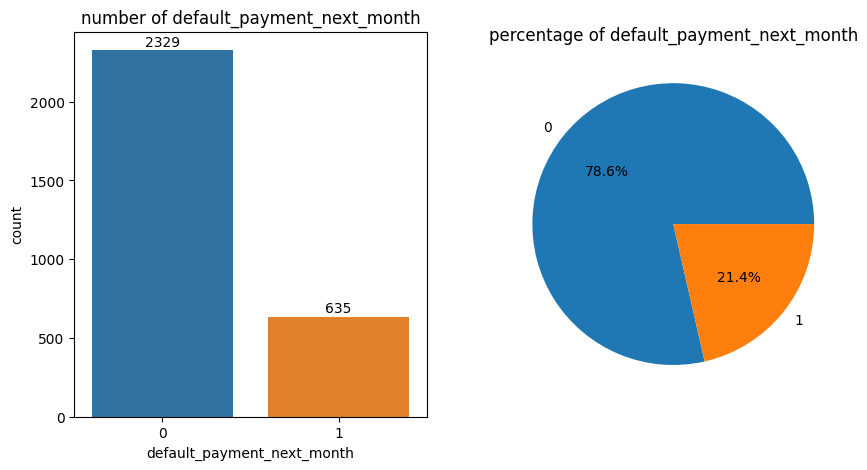

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
fig = sns.countplot(x = 'default_payment_next_month',data= data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")
plt.title('number of default_payment_next_month')

plt.subplot(1,2,2)
plt.pie(data.default_payment_next_month.value_counts(), labels= data.default_payment_next_month.value_counts().index, autopct = '%1.1f%%')
plt.title('percentage of default_payment_next_month')
plt.show()

Pada kolom default_payment_next_month terdapat 2 nilai yaitu 0 dan 1, untuk 0 adalah no dan untuk 1 adalah yes, dari dataset ini jumlah dari label 1 atau no ada sebanyak 2329 dan untuk no ada sebanyak 635, jika dibandingkan persentasenya menjadi 78.6% untuk label 0 dan 21.4% untuk label 1, sehingga kolom ini memiliki data yang tidak seimbang atau imbalance

### limit_balance

Skewness : 1.0006047564306488
Mean : 163356.95006747637
Median : 140000.0


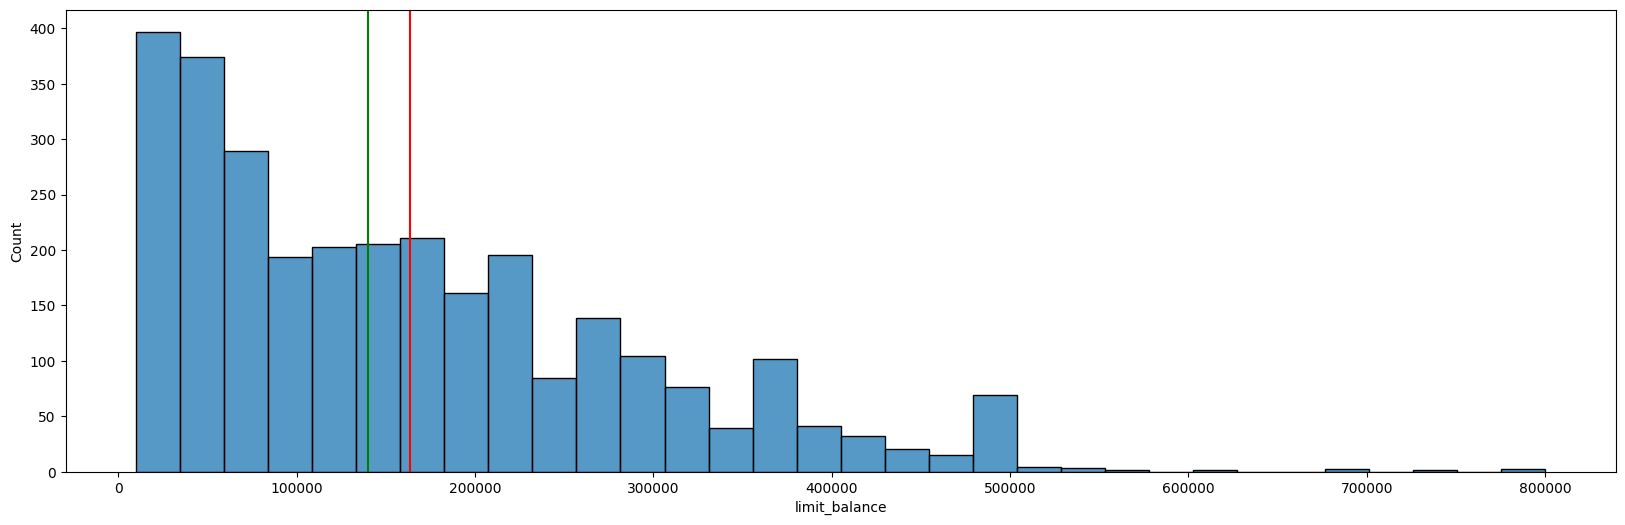

In [14]:
plt.figure(figsize=(20,6))
sns.histplot(x = 'limit_balance',data= data)
plt.axvline(data.limit_balance.mean(), color = 'r', label = 'Mean')
plt.axvline(data.limit_balance.median(), color = 'g', label = 'Median')

print('Skewness :', data.limit_balance.skew())
print('Mean :', data.limit_balance.mean())
print('Median :', data.limit_balance.median())

Dari histogram diatas kebanyakan limit yang dimiliki kurang dari 100000, berdasarkan personal judgment kolom limit_balance ini digunakan untuk mengukur apakah seseorang dapat membayar limit tersebut atau tidak, jika seseorang dapat membayar limit_tersebut maka limit_balance yang didapatkan seseorang akan meningkat, dari histogram tersebut terlihat juga bahwa limit_balance ini terdistribusi skewed dengan rata rata 163357 dan nilai tengah 140000.

### sex

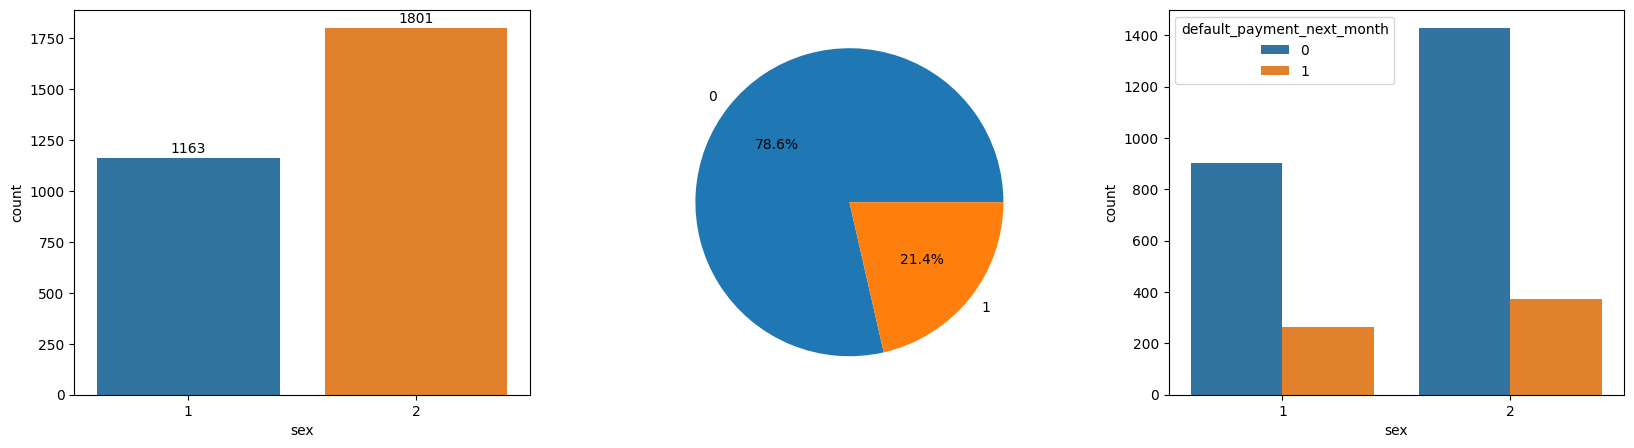

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
fig = sns.countplot(x='sex', data = data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,3,2)
plt.pie(data.default_payment_next_month.value_counts(), labels= data.default_payment_next_month.value_counts().index, autopct = '%1.1f%%')

plt.subplot(1,3,3)
sns.countplot(x='sex', hue='default_payment_next_month', data = data)
plt.show()

Dari 3 grafik diatas kolom sex dengan label 1 adalah male dan label 2 adalah female, pada dataset ini kebanyakan dimiliki oleh sex female dengan data sebanyak 1801 dan untuk sex male sebanyak 1163 dengan perbandingan 78.6% berbanding 21.4%, dari countplot juga bisa dilihat bahwa baik female ataupun male jika dikaitkan dengan kolom default_payment_next_month masing masing sex memiliki label terbanyak 0 atau no.

### Education level

In [16]:
data.education_level.value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

In [17]:
data['education_level'] = data.education_level.replace(0,6)
data.education_level.value_counts()

2    1400
1    1038
3     483
5      24
4      13
6       6
Name: education_level, dtype: int64

<AxesSubplot: xlabel='default_payment_next_month', ylabel='education_level'>

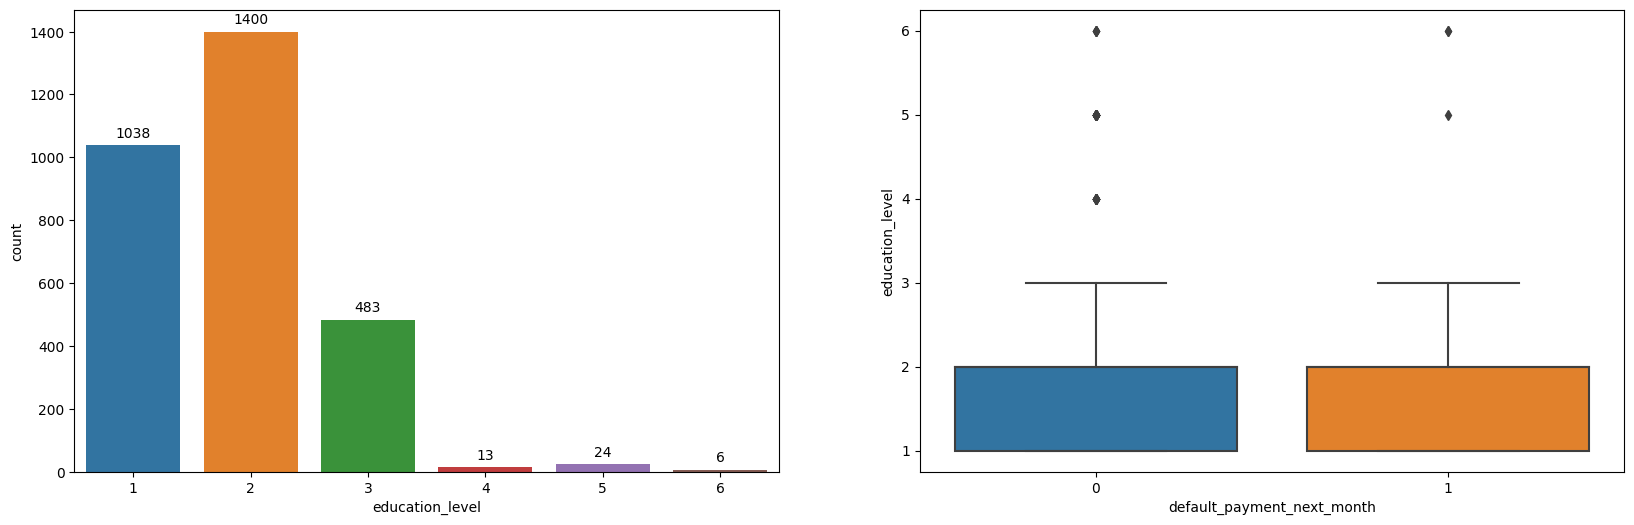

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
fig = sns.countplot(x='education_level', data = data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
sns.boxplot(y='education_level', x='default_payment_next_month', data = data)

Dari countplot diatas kebanyak orang memilik tingkat pendidikan level 2 atau university sebanyak 1400, dan jika dilihat dari boxplot kolom education_level dengan kolom default_payment_next_month tidak memiliki hubungan atau tidak ada korelasi antara 2 kolom ini.

### Marital Status

In [19]:
data.marital_status.value_counts()

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64

pada kolom diatas setiap nomor menjelaskan status yaitu 1. Married, 2.Single, 3. Others, sedangkan pada dataset ini terdapat label 0 yang tidak menjelaskan sesuatu, maka saya asumsikan label 0 ini dianggap others.

In [20]:
data['marital_status'] = data.marital_status.replace(0,3)
data.marital_status.value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

<AxesSubplot: xlabel='default_payment_next_month', ylabel='marital_status'>

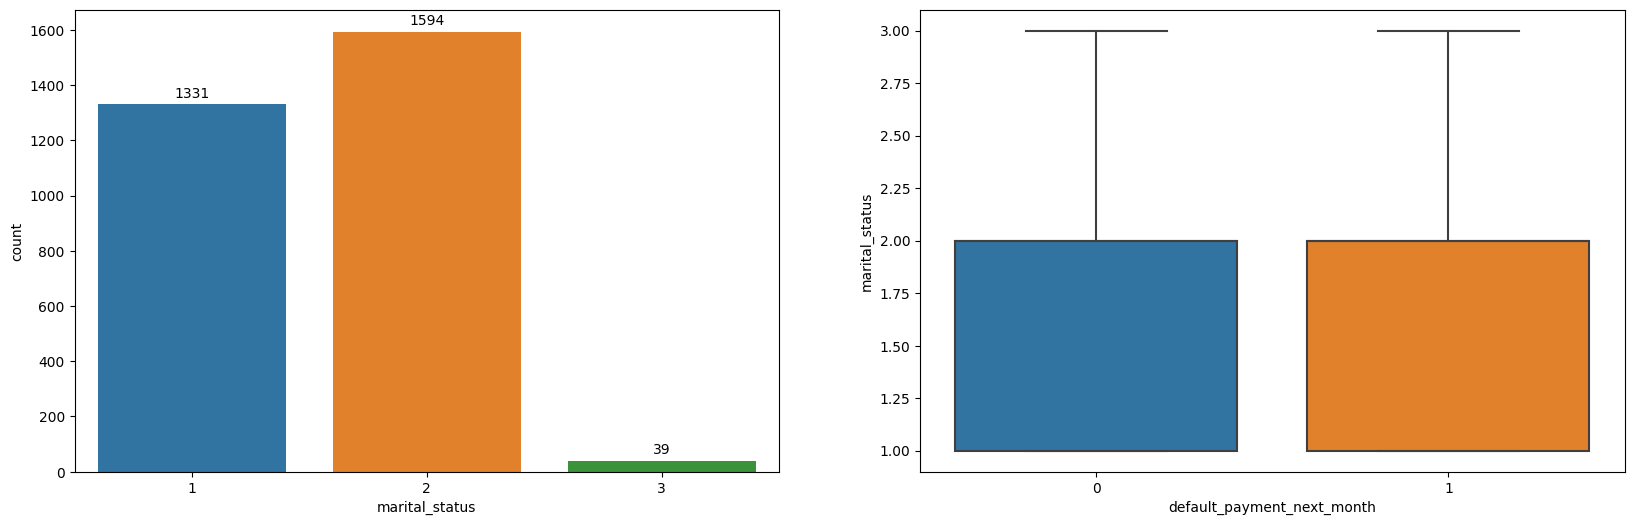

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
fig =sns.countplot(x='marital_status', data = data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
sns.boxplot(x='default_payment_next_month', y='marital_status', data = data)

Dari grafik diatas kolom marital_status memiliki 3 label yaitu 1, 2 dan 3, untuk 1 adalah married, 2 adalah single dan 3 others, dapat dilihat kebanyakan yang menggukan kartu kredit adalah yang berstatus single sebanyal 1594, dari kolom boxplot kita bisa lihat bahwa kolom marital_status tidak memiliki hubungan atau korelasi dengan kolom default_payment_next_month

### Age

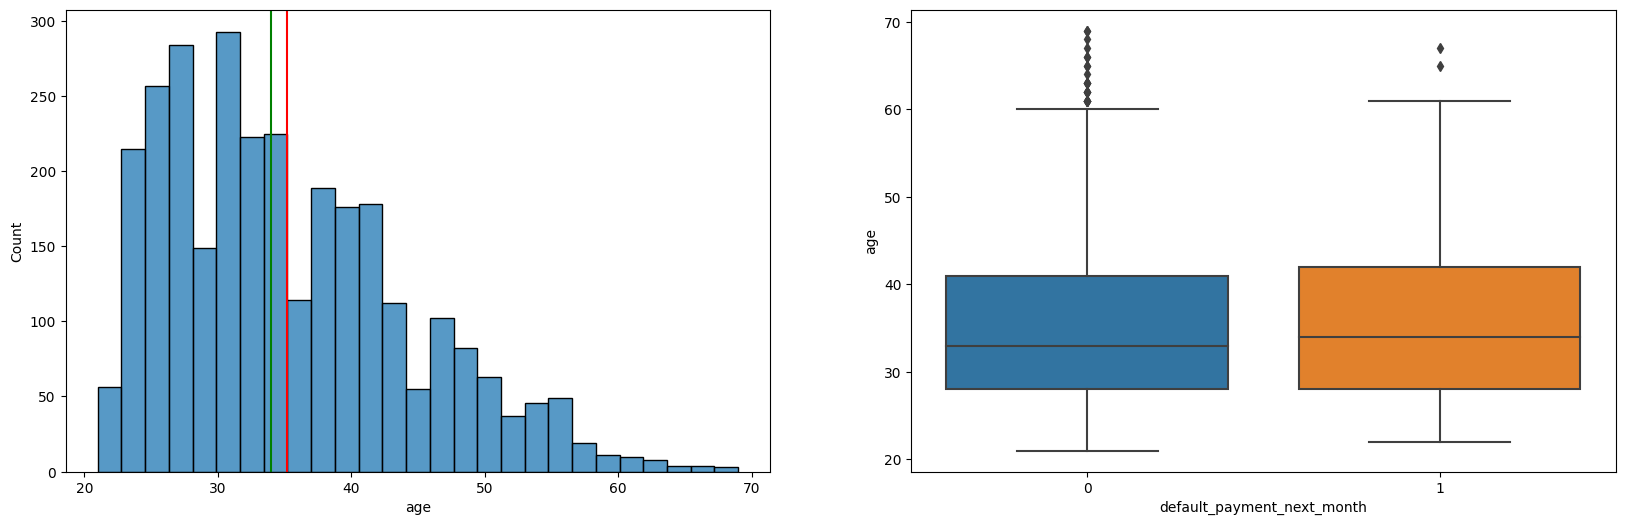

Skewness : 0.7726317877077614
Mean : 35.19365721997301
Median : 34.0


In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(x='age', data =data)
plt.axvline(data.age.mean(), color = 'r', label = 'Mean')
plt.axvline(data.age.median(), color = 'g', label = 'Median')

plt.subplot(1,2,2)
sns.boxplot(x='default_payment_next_month', y='age', data = data)
plt.show()


print('Skewness :', data.age.skew())
print('Mean :', data.age.mean())
print('Median :', data.age.median())

Dari histogram diatas pengguna kartu kredit kebanyakan berkisar dari umur 20 sampai 30 tahun, dengan rata rata seluruh pengguna kartu kredit 35 tahun dan nilai tengah 34 tahun, histogram diatas memiliki bentuk distribusi skewed, dari boxplot bisa terlihat bahwa kolom age dengan kolom default_payment_next_month tidak saling berkaitan atau tidak memiliki korelasi

### Pay_0 sampai Pay_6

<AxesSubplot: xlabel='pay_6', ylabel='count'>

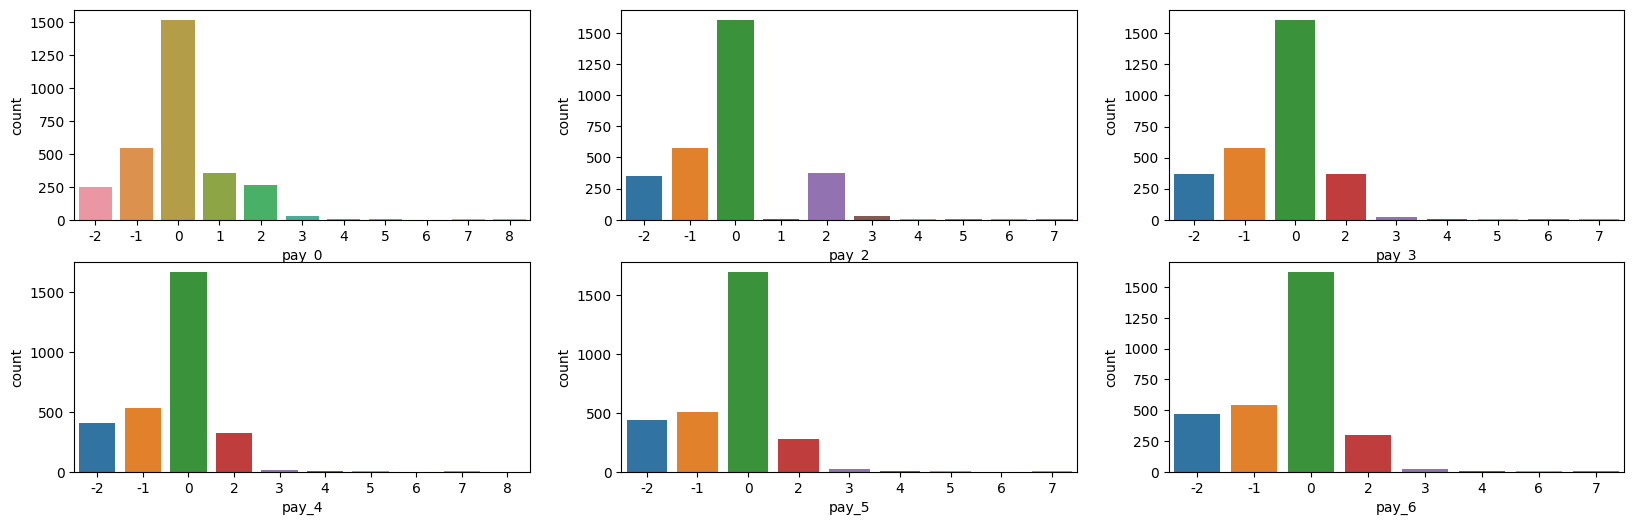

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.countplot(x=data.pay_0)

plt.subplot(2,3,2)
sns.countplot(x=data.pay_2)

plt.subplot(2,3,3)
sns.countplot(x=data.pay_3)

plt.subplot(2,3,4)
sns.countplot(x=data.pay_4)

plt.subplot(2,3,5)
sns.countplot(x=data.pay_5)

plt.subplot(2,3,6)
sns.countplot(x=data.pay_6)


Grafik diatas memberikan informasi dengan label -2 sampai 0 adalah orang yang membayar kredit tepat waktu dan untuk label 1 adalah orang yang telat bayar 1 bulan, label 2 telat bayar 2 bulan dan seterusnya, pada informasi yang diberikan dari grafik diatas kebanyakan orang membayarkan kreditnya tepat waktu pada setiap bulan, namun ada beberapa yang telat bayar pada tiap bulannya.

<AxesSubplot: xlabel='default_payment_next_month', ylabel='pay_6'>

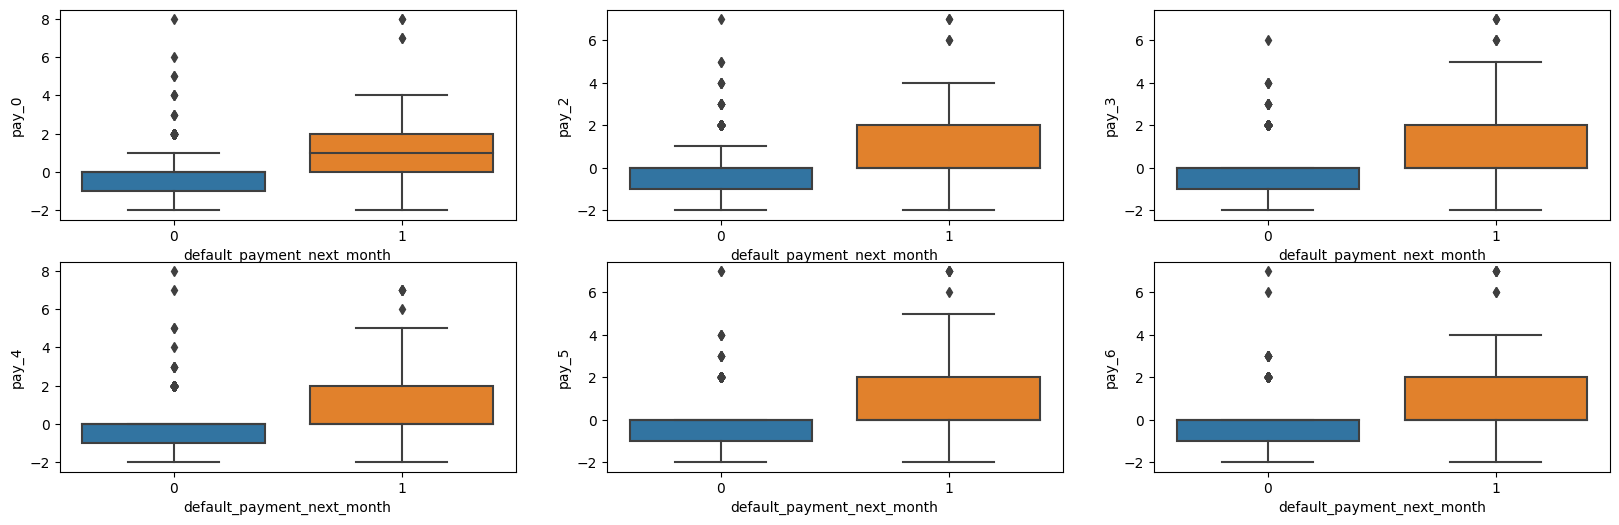

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.boxplot(x='default_payment_next_month', y=data.pay_0, data = data)

plt.subplot(2,3,2)
sns.boxplot(x='default_payment_next_month', y=data.pay_2, data = data)

plt.subplot(2,3,3)
sns.boxplot(x='default_payment_next_month', y=data.pay_3, data = data)

plt.subplot(2,3,4)
sns.boxplot(x='default_payment_next_month', y=data.pay_4, data = data)

plt.subplot(2,3,5)
sns.boxplot(x='default_payment_next_month', y=data.pay_5, data = data)

plt.subplot(2,3,6)
sns.boxplot(x='default_payment_next_month', y=data.pay_6, data = data)

Dari boxplot diatas terlihat ada banyak outlier pada setiap kolom dari pay_0 sampai pay_6 dan dari boxplot terlihat adanya korelasi antara kolom pay_0 sampai pay_6 dengan kolom default_payment_next_month

### bill_amt_1 sampai bill_amt_6

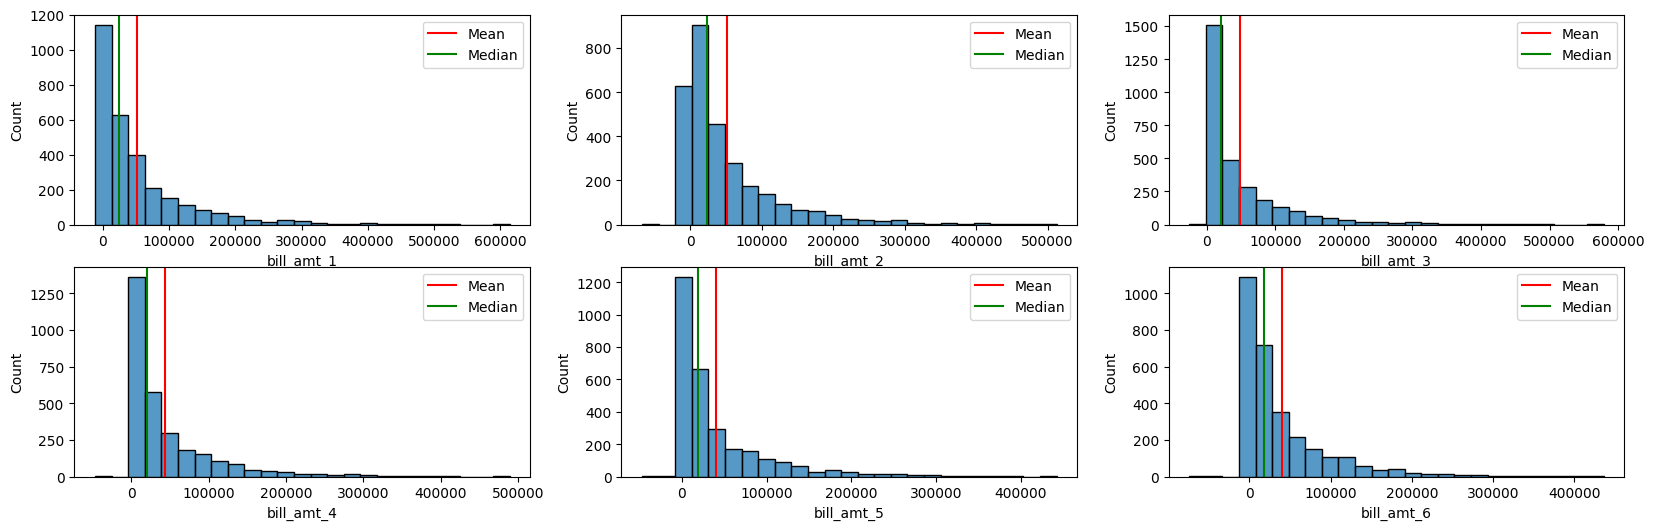

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.histplot(x=data.bill_amt_1, bins=25)
plt.axvline(data.bill_amt_1.mean(), color = 'r', label = 'Mean')
plt.axvline(data.bill_amt_1.median(), color = 'g', label = 'Median')
plt.legend()

plt.subplot(2,3,2)
sns.histplot(x=data.bill_amt_2, bins=25)
plt.axvline(data.bill_amt_2.mean(), color = 'r', label = 'Mean')
plt.axvline(data.bill_amt_2.median(), color = 'g', label = 'Median')
plt.legend()

plt.subplot(2,3,3)
sns.histplot(x=data.bill_amt_3, bins=25)
plt.axvline(data.bill_amt_3.mean(), color = 'r', label = 'Mean')
plt.axvline(data.bill_amt_3.median(), color = 'g', label = 'Median')
plt.legend()

plt.subplot(2,3,4)
sns.histplot(x=data.bill_amt_4, bins=25)
plt.axvline(data.bill_amt_4.mean(), color = 'r', label = 'Mean')
plt.axvline(data.bill_amt_4.median(), color = 'g', label = 'Median')
plt.legend()

plt.subplot(2,3,5)
sns.histplot(x=data.bill_amt_5, bins=25)
plt.axvline(data.bill_amt_5.mean(), color = 'r', label = 'Mean')
plt.axvline(data.bill_amt_5.median(), color = 'g', label = 'Median')
plt.legend()

plt.subplot(2,3,6)
sns.histplot(x=data.bill_amt_6, bins=25)
plt.axvline(data.bill_amt_6.mean(), color = 'r', label = 'Mean')
plt.axvline(data.bill_amt_6.median(), color = 'g', label = 'Median')
plt.legend()
plt.show()

Histogram diatas menampilkan distribusi data pada kolom bill_amt_1 sampai bill_amt_6, dari setiap histogram kebanyakan memiliki total tagihan 0 dan dan rata rata total tagihan dari setiap histogram antara 0 sampai kurang dari 100000 pegitu juga dengan nilai tengah berada dalam range yang sama dengan rata rata, jika dilihat dari bentuk distribusi nya setiap kolom memiliki bentuk distribusi skewed.

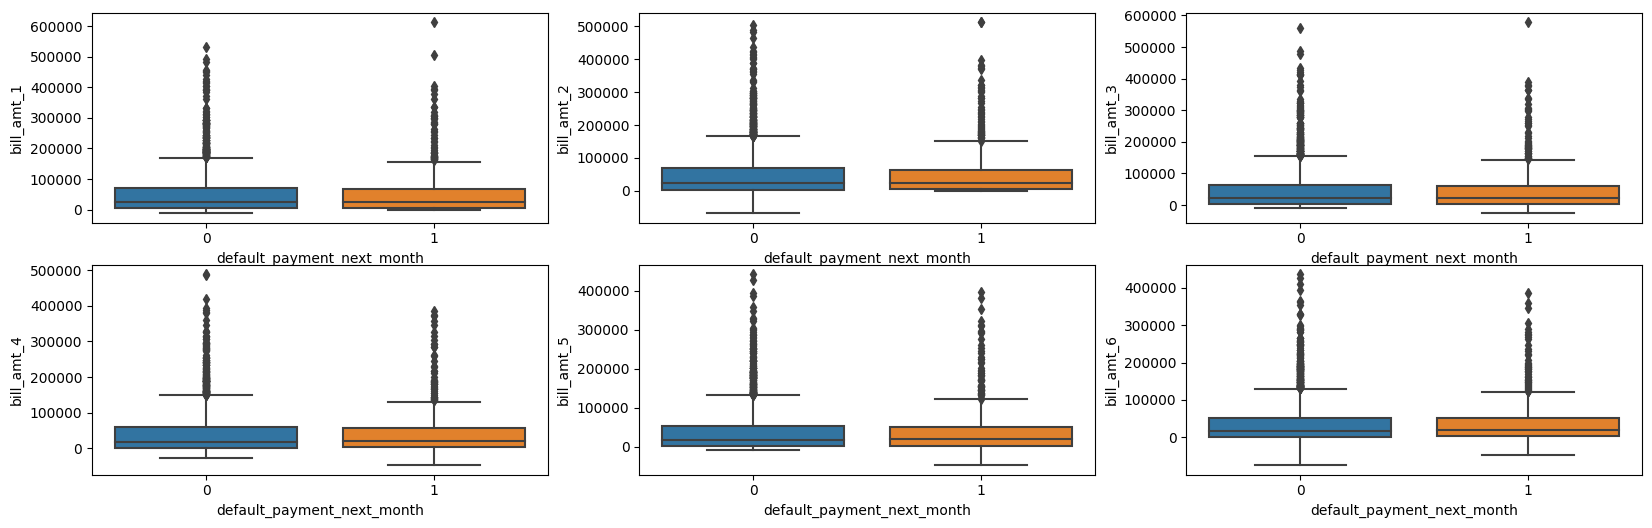

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.boxplot(x='default_payment_next_month', y='bill_amt_1', data = data)

plt.subplot(2,3,2)
sns.boxplot(x='default_payment_next_month', y='bill_amt_2', data = data)

plt.subplot(2,3,3)
sns.boxplot(x='default_payment_next_month', y='bill_amt_3', data = data)

plt.subplot(2,3,4)
sns.boxplot(x='default_payment_next_month', y='bill_amt_4', data = data)

plt.subplot(2,3,5)
sns.boxplot(x='default_payment_next_month', y='bill_amt_5', data = data)

plt.subplot(2,3,6)
sns.boxplot(x='default_payment_next_month', y='bill_amt_6', data = data)

plt.show()

Dapat dilihat dari boxplot diatas, kolom bill_amt_1 sampai bill_amt_6 ini memiliki outliers dan juga dapat dilihat hubungan antara kolom bill_amt dengan default_payment_next_month ini tidak memiliki korelasi.

### Pay_amt_1 sampai pay_amt_6

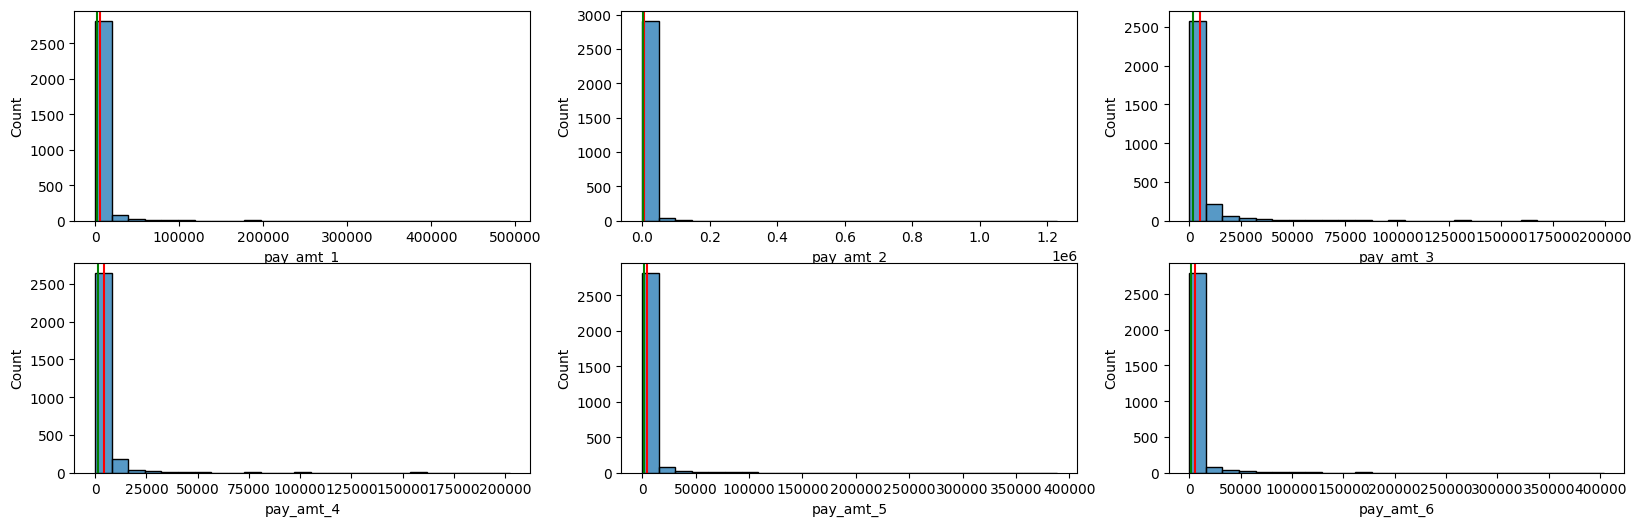

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.histplot(x=data.pay_amt_1, bins=25)
plt.axvline(data.pay_amt_1.mean(), color = 'r', label = 'Mean')
plt.axvline(data.pay_amt_1.median(), color = 'g', label = 'Median')

plt.subplot(2,3,2)
sns.histplot(x=data.pay_amt_2, bins=25)
plt.axvline(data.pay_amt_2.mean(), color = 'r', label = 'Mean')
plt.axvline(data.pay_amt_2.median(), color = 'g', label = 'Median')

plt.subplot(2,3,3)
sns.histplot(x=data.pay_amt_3, bins=25)
plt.axvline(data.pay_amt_3.mean(), color = 'r', label = 'Mean')
plt.axvline(data.pay_amt_3.median(), color = 'g', label = 'Median')

plt.subplot(2,3,4)
sns.histplot(x=data.pay_amt_4, bins=25)
plt.axvline(data.pay_amt_4.mean(), color = 'r', label = 'Mean')
plt.axvline(data.pay_amt_4.median(), color = 'g', label = 'Median')

plt.subplot(2,3,5)
sns.histplot(x=data.pay_amt_5, bins=25)
plt.axvline(data.pay_amt_5.mean(), color = 'r', label = 'Mean')
plt.axvline(data.pay_amt_5.median(), color = 'g', label = 'Median')

plt.subplot(2,3,6)
sns.histplot(x=data.pay_amt_6, bins=25)
plt.axvline(data.pay_amt_6.mean(), color = 'r', label = 'Mean')
plt.axvline(data.pay_amt_6.median(), color = 'g', label = 'Median')

Dari histogram diatas kolom pay_amt_1 sampai pay_amt_6 terdistribusi skewed, dan kebanyakan distribusi pada kolom ini memiliki range antara 0 sampai 10000

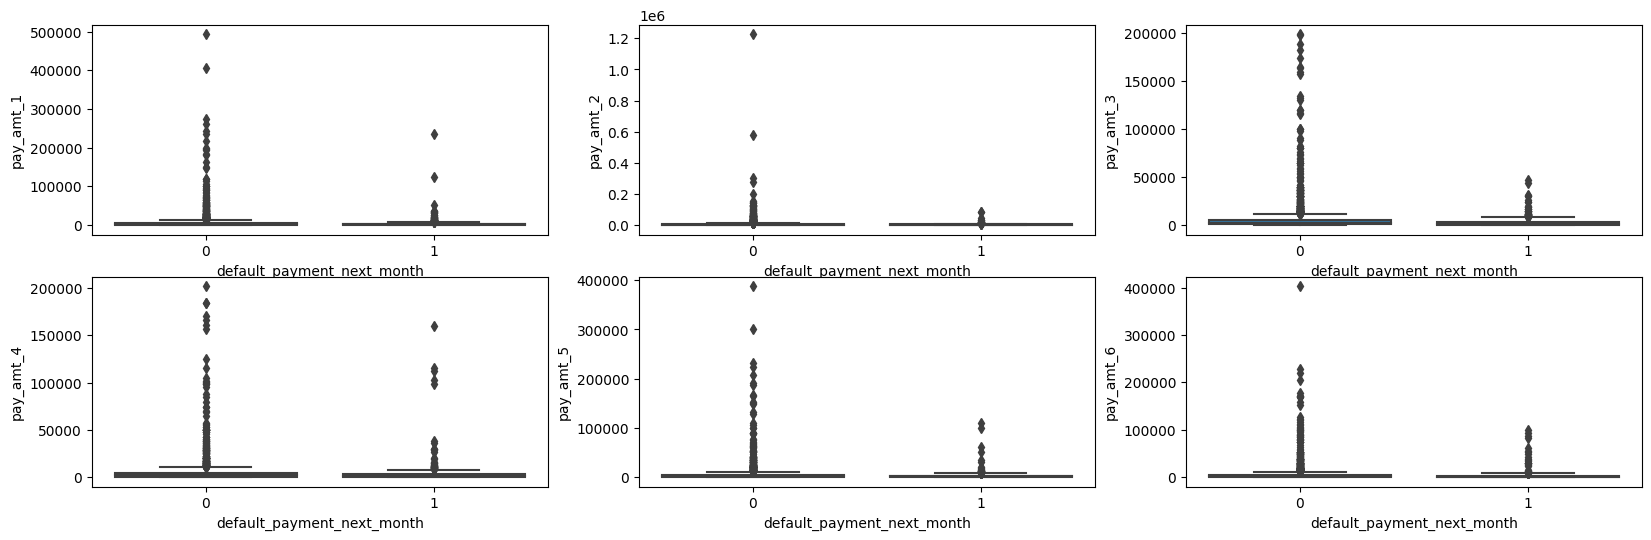

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.boxplot(x='default_payment_next_month', y='pay_amt_1', data = data)

plt.subplot(2,3,2)
sns.boxplot(x='default_payment_next_month', y='pay_amt_2', data = data)

plt.subplot(2,3,3)
sns.boxplot(x='default_payment_next_month', y='pay_amt_3', data = data)

plt.subplot(2,3,4)
sns.boxplot(x='default_payment_next_month', y='pay_amt_4', data = data)

plt.subplot(2,3,5)
sns.boxplot(x='default_payment_next_month', y='pay_amt_5', data = data)

plt.subplot(2,3,6)
sns.boxplot(x='default_payment_next_month', y='pay_amt_6', data = data)

plt.show()

dari boxplot diatas dapat diketahui bahwa kolom pay_amt_1 sampai pay_amt_6 memiliki outliers dan bisa dilihat juga bahwa kolom pay_amt dengan kolom default_payment_next_month tidak memiliki korelasi

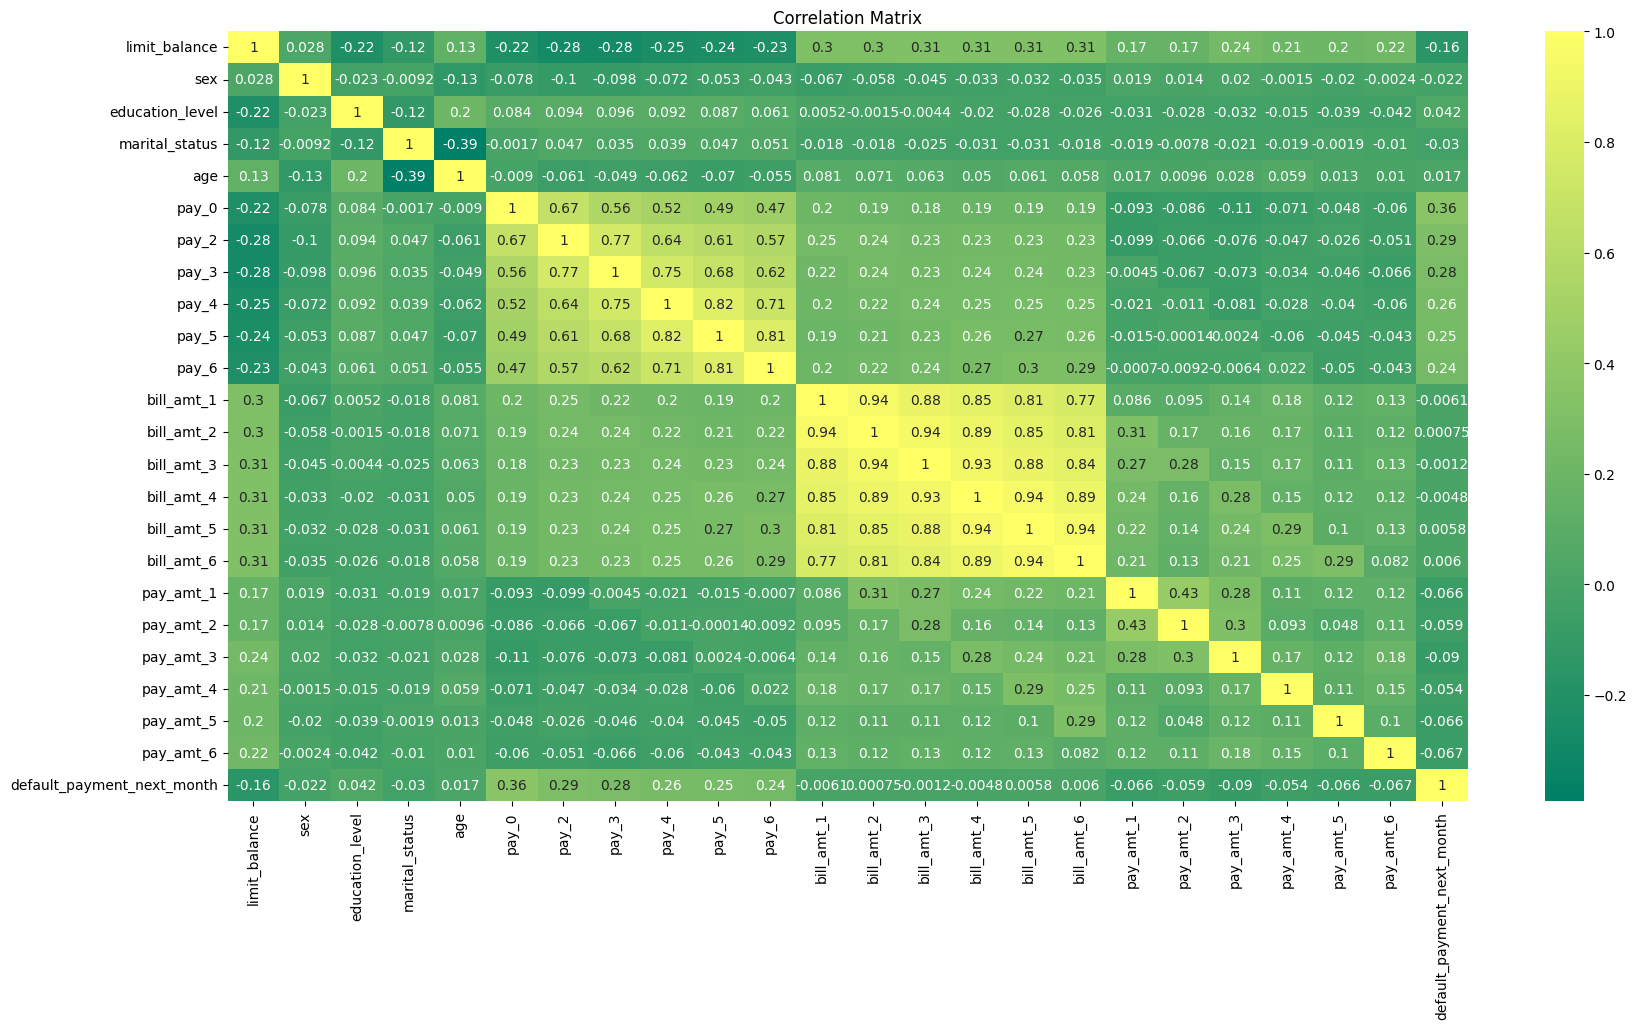

In [29]:
corr = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='summer')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap diatas dapat disimpulkan :
- kolom default_payment_next_month memiliki hubungan dengan kolom pay_0 sampai dengan kolom pay_6
- kolom pay_0 sampai dengan kolom pay_6 meiliki hubungan dengan kolom bill_amt_1 sampai kolom bill_amt_6, limit_balance dan juga memiliki hubungan dengan antar kolom pay
- kolom limit_balance memiliki hubungan dengan kolom eduaction_level, sex, pay_0 sampai pay_6, bill_amt_1 sampai bill_amt_6 dan pay_amt_1 sampai pay_amt_6
- kolom bill_amt_1 sampai kolom bill_amt_6 memiliki hubungan denan kolom pay_0 sampai pay_6, pay_amt_1 sampai pay_amt_6, limit_balance dan atar masing masing kolom bill_amt
- kolom pay_amt_1 sampai pay_amt_6 memiliki hubungan dengan kolom bill_amt_1 sampai kolom bill_amt_6, limit_balance dan antar kolom pay_amt
- kolom education level memiliki hubungan dengan kolom limit_balance dan age
- kolom marital status memiliki hubungan dengan kolom age

## Data Preprocessing

### Split Data

Dataset akan dibagi menjadi 3 dengan perbandingan 70% data training, 20% data validation dan 10% data test, untuk data test akan digunakan pada model inference

In [30]:
df_train_val, df_test = train_test_split(data, test_size=0.1, random_state=27, stratify=data.default_payment_next_month)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=27, stratify=df_train_val.default_payment_next_month)

In [31]:
print(f'df_train proportion: {len(df_train) / len(data):.1f}')
print(f'df_val proportion: {len(df_val) / len(data):.1f}')
print(f'df_test proportion: {len(df_test) / len(data):.1f}')

df_train proportion: 0.7
df_val proportion: 0.2
df_test proportion: 0.1


In [32]:
df_train.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
431,470000,2,1,1,28,0,0,0,0,0,0,178262,177644,171997,165014,158839,148035,6100,6000,7100,5100,5200,4900,0
1384,260000,1,2,2,32,0,0,-2,-1,-1,-1,60587,-83,-83,458,-7941,156600,0,0,541,4538,166000,6000,0
1478,130000,1,2,2,37,0,0,0,-2,-2,-2,131446,102650,0,0,0,0,5000,0,0,0,0,0,0
587,200000,2,2,2,31,0,0,0,0,0,0,101431,102604,125731,120465,118759,119378,5000,30000,5809,4002,4500,4100,0
1278,30000,2,3,2,44,0,0,3,2,2,2,21007,27506,26784,28123,27994,27029,7200,0,2100,1000,0,3000,0


### Missing values handling

In [33]:
df_train.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

### Outliers Handling

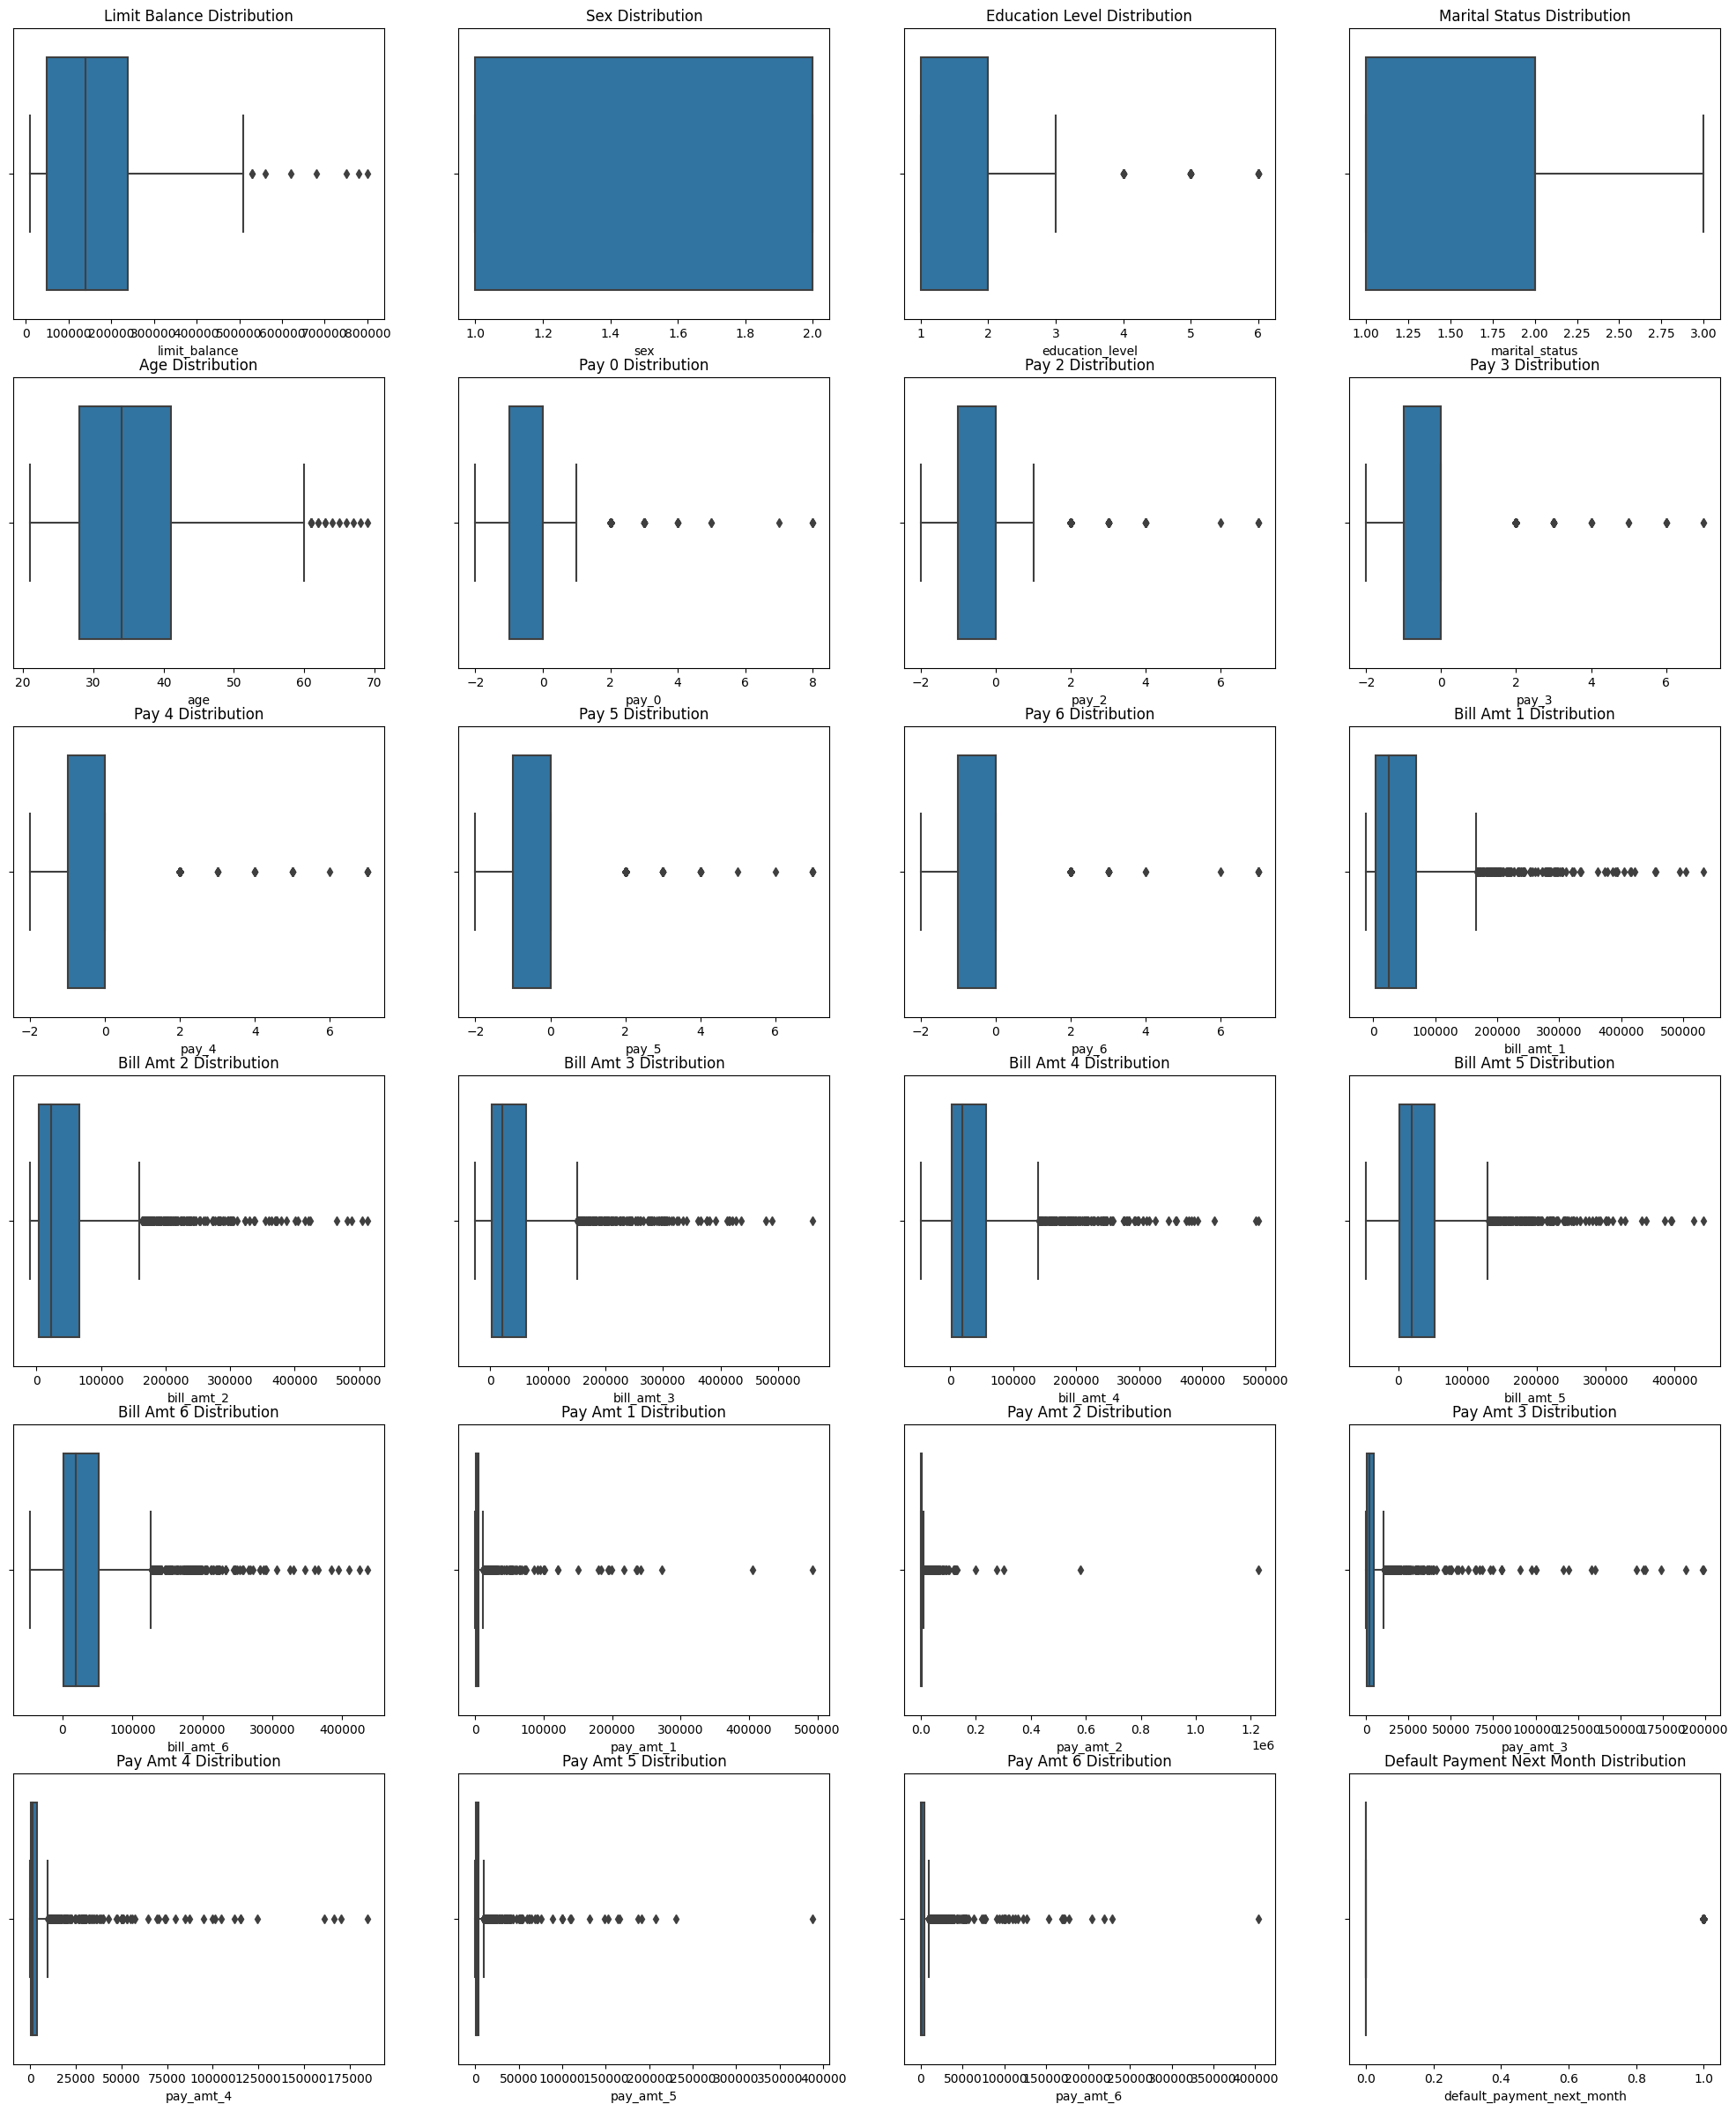

In [34]:
plt.figure(figsize=(25, 30))
for col in df_train.columns:
    plt.subplot(6, 4, data.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=df_train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

Pada boxplot diatas hampir semua kolom memiliki outliers

In [35]:
# Func untuk deteksi outlier
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75) + 3 * IQR
    lower_limit = df[col].quantile(0.25) - 3 * IQR
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)]

In [36]:
# Check Outliers
cols = df_train.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(df_train, cols[i]).shape[0] / df_train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,limit_balance,0.00
1,sex,0.00
2,education_level,0.28
3,marital_status,0.00
4,age,0.00
5,pay_0,0.52
6,pay_2,0.52
7,pay_3,0.56
8,pay_4,0.70
9,pay_5,0.70


In [37]:
# Data Outliers
cols = df_train.columns
for i in range(len(cols)):
    data_with_outlier = upper_lower(df_train, cols[i])
data_with_outlier

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2251,50000,2,2,1,39,1,2,2,2,2,2,16983,16413,21128,20492,30079,29460,0,5000,0,10000,0,10000,1
2025,30000,1,3,2,46,3,2,0,0,0,0,13784,13277,13984,14350,14650,15156,0,1234,600,532,750,825,1
2033,50000,2,2,2,23,3,2,2,2,0,0,22613,21957,24482,24693,25283,27367,0,3200,910,1000,2500,0,1
1658,200000,2,1,2,40,2,2,0,0,0,2,185696,181236,185410,189069,197736,183299,0,8600,8300,13257,917,7000,1
1099,160000,1,2,1,39,0,0,0,2,2,0,34171,34939,38038,38683,37764,39053,1639,3683,1564,0,2053,3228,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,80000,2,1,2,24,0,0,2,0,0,0,39813,46375,43576,28468,25971,23686,9425,1,2012,1091,1006,2516,1
1360,20000,1,1,1,31,0,0,0,2,-1,-1,4596,5675,8231,2717,4733,1099,1161,2717,0,4733,1099,0,1
1722,100000,2,2,2,40,2,0,0,2,2,2,40626,41945,45247,45208,46160,48268,2000,4000,1000,2000,3000,0,1
1773,150000,1,1,2,36,2,2,2,-2,-2,-2,167094,86193,-25443,-46627,-46627,-46627,5068,9,0,0,0,0,1


In [38]:
# Melakukan handling outlier menggunakakan winsorizer
capper = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'])
df_train = capper.fit_transform(df_train)
df_train


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
431,470000,2,1,1,28,0,0,0,0,0,0,178262,177644,171997,165014,158839,148035,6100,6000,7100,5100,5200,4900,0
1384,260000,1,2,2,32,0,0,-2,-1,-1,-1,60587,-83,-83,458,-7941,156600,0,0,541,4538,15116,6000,0
1478,130000,1,2,2,37,0,0,0,-2,-2,-2,131446,102650,0,0,0,0,5000,0,0,0,0,0,0
587,200000,2,2,2,31,0,0,0,0,0,0,101431,102604,125731,120465,118759,119378,5000,17278,5809,4002,4500,4100,0
1278,30000,2,3,2,44,0,0,3,2,2,2,21007,27506,26784,28123,27994,27029,7200,0,2100,1000,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,50000,2,2,1,28,1,2,2,2,0,0,38612,37509,15377,12590,11209,7448,0,5000,0,3023,5000,4000,0
611,140000,2,2,2,29,0,0,0,0,0,0,141740,138128,128812,131374,135353,137238,7001,4700,4706,6100,5300,4806,0
546,70000,2,2,1,26,0,0,0,0,0,0,41659,42652,43705,45965,46900,47884,1687,1740,3000,1700,1739,1770,0
1685,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1


Outlier yang digunakan adalah metode extreme iqr, karena perbeaan range yg jauh sangat wajar seperti pembayaran yg telat dibayarkan 3 bulan sehingga pada bulan ke 4 dibayarkan sekaligus, jadi saya menggunakan extreme outlier untuk data yang outliernya sangat jauh sehingga tidak menghilangkan banyak data

### Feature Selection

pada bagian ini dilakukan pemilihan featurs dan target, feature yang dipakai adalah semua kolom karena setiap kolom memiliki korelasi satu sama lain.

In [39]:
# Feature & Target selection
X_train = df_train.drop(columns=['default_payment_next_month']) # Features
y_train = df_train['default_payment_next_month'] # Target

X_val = df_val.drop(columns=['default_payment_next_month']) # Features
y_val = df_val['default_payment_next_month'] # Target

### Pipe line

Pada bagian ini dilakukan pembuatan pipeline untuk melakukan scaling menggunakan StandardScaler dan membuat model dengan algoritma classification yang digunakan adalah `Linear Regression`, `Support Vector Machine`, `Decision Tree`, `Random Forest`, `K-Nearest Neighbors`, `Naive Bayes` dan `Gradient Boosting`.

In [40]:
# Logistic Regression Pipeline
pipe_lin_reg = Pipeline([('outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                         ('scaling', StandardScaler()),
                         ('classifier', LogisticRegression(random_state=27))])
# Support Vector Machine Pipeline
pipe_SVC = Pipeline([('outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                     ('scaling', StandardScaler()),
                     ('classifier', SVC(random_state=27))])
# Decision Tree Pipeline
pipe_tree = Pipeline([('outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                     ('scaling', StandardScaler()),
                     ('classifier', DecisionTreeClassifier(random_state=27))])
# Random Forest Pipeline
pipe_rf = Pipeline([('outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                    ('scaling', StandardScaler()),
                    ('classifier', RandomForestClassifier(random_state=27))])
# K-Nearest Neighbors Pipeline
pipe_knn = Pipeline([('outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                     ('scaling', StandardScaler()),
                     ('classifier', KNeighborsClassifier())])
# Naive Bayes Pipeline
pipe_bayes = Pipeline([('outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                     ('scaling', StandardScaler()),
                     ('classifier', GaussianNB())])
# Gradient Boosting Pipeline
pipe_gboost = Pipeline([('outliers', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                        ('scaling', StandardScaler()),
                        ('classifier', GradientBoostingClassifier(random_state=27))])

Membuat dictionary yang berisi hyperparameter untuk setiap model yang nantinya dicari parameter terbaik menggunakan gridsearch

In [41]:
# Membuat variabel untuk hyperparameter
# Logistic Regression
logistic_params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                   'classifier__penalty': ['l1', 'l2'],
                   'classifier__solver': ['liblinear', 'saga'],
                   'classifier__max_iter': [1000, 10000]}

# SVC
svc_params = {'classifier__C': [0.1, 1, 10], 
              'classifier__kernel': ['linear', 'rbf', 'poly','sigmoid'],
              'classifier__gamma': ['auto', 'scale']}

# Decision Tree
tree_params = {'classifier__criterion': ['gini', 'entropy'],
               'classifier__max_depth': [2, 3, 4, 5, 6], 
               'classifier__min_samples_split': [2, 3, 4, 5, 6],
               'classifier__min_samples_leaf': [2, 3, 4, 5, 6]}

# Random Forest
rf_params = {'classifier__criterion': ['gini', 'entropy'],
                 'classifier__max_features': ['auto', 'sqrt', 'log2'],
                 'classifier__n_estimators': [100, 150, 200, 250, 300]}

# KNN
knn_params = {'classifier__n_neighbors': [3, 5, 7, 9], 
              'classifier__weights': ['uniform', 'distance'], 
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Naive Bayes
bayes_params = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Gradient Boosting             
gboost_params = {'classifier__n_estimators': [500],
                 'classifier__max_depth': [4],
                 'classifier__min_samples_split': [5],
                 'classifier__learning_rate': [0.01],
                }

## Model Definition

di bagian ini semua model yang sudah ditentukan di buat dan semua model ini akan ditunning menggunakan GridSearchCV dengan menggunakan 5 cross validation

In [42]:
# Melakukan definisi model menggunakan gridsearch
logistic = GridSearchCV(pipe_lin_reg, param_grid=logistic_params, cv=5, n_jobs=-1)
svc = GridSearchCV(pipe_SVC, param_grid=svc_params, cv=5, n_jobs=-1)
tree = GridSearchCV(pipe_tree, param_grid=tree_params, cv=5, n_jobs=-1)
rf = GridSearchCV(pipe_rf, param_grid=rf_params, cv=5, n_jobs=-1)
knn = GridSearchCV(pipe_knn, param_grid=knn_params, cv=5, n_jobs=-1)
naive = GridSearchCV(pipe_bayes, param_grid=bayes_params, cv=5, n_jobs=-1)
gboost = GridSearchCV(pipe_gboost, param_grid=gboost_params, cv=5, n_jobs=-1)

## Model Training

Pada bagian ini semua data dilatih menggunakan X_train dan y_train , dan mencari hyperparameter terbaik untuk dilakukan prediksi

In [43]:
# Model Trainng tanpa hyperparameter
pipe_lin_reg.fit(X_train, y_train)
pipe_SVC.fit(X_train, y_train)
pipe_tree.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_bayes.fit(X_train, y_train)
pipe_gboost.fit(X_train, y_train)

Pipeline(steps=[('outliers', Winsorizer(capping_method='iqr', tail='both')),
                ('scaling', StandardScaler()),
                ('classifier', GradientBoostingClassifier(random_state=27))])

In [44]:
# Model Trainng Menggunakan Hyperparameter
logistic.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive.fit(X_train, y_train)
gboost.fit(X_train, y_train)

c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('outliers',
                                        Winsorizer(capping_method='iqr',
                                                   tail='both')),
                                       ('scaling', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=27))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01],
                         'classifier__max_depth': [4],
                         'classifier__min_samples_split': [5],
                         'classifier__n_estimators': [500]})

In [45]:
# Mencari Hyperparameter Terbaik Dari Setiap Model
best_logistic = logistic.best_estimator_
print('Logistic Regression Best Hyperparameter')
print(logistic.best_params_)

best_svc = svc.best_estimator_
print('Support Vector Machine Best Hyperparameter')
print(svc.best_params_)

best_tree = tree.best_estimator_
print('Decision Tree Best Hyperparameter')
print(tree.best_params_)

best_rf = rf.best_estimator_
print('Random Forest Best Hyperparameter')
print(rf.best_params_)

best_knn = knn.best_estimator_
print('K-Nearest Neighbors Best Hyperparameter')
print(knn.best_params_)

best_bayes = naive.best_estimator_
print('Naive Bayes Best Hyperparameter')
print(naive.best_params_)

best_gboost = gboost.best_estimator_
print('Gradient Boosting Best Hyperparameter')
print(gboost.best_params_)

Logistic Regression Best Hyperparameter
{'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Support Vector Machine Best Hyperparameter
{'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Decision Tree Best Hyperparameter
{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2}
Random Forest Best Hyperparameter
{'classifier__criterion': 'entropy', 'classifier__max_features': 'auto', 'classifier__n_estimators': 300}
K-Nearest Neighbors Best Hyperparameter
{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Naive Bayes Best Hyperparameter
{'classifier__var_smoothing': 3}
Gradient Boosting Best Hyperparameter
{'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 500}


Setelah model-model diatas dilatih, lalu disimpan di variabel baru yang berisi hyperparametes terbaiknya untuk digunakan pada saat prediksi

## Model Evaluation

Pada bagian akan dilakukan evaluasi untuk melihat performa dari setiap model yang sudah menggunakan best estimator berdasarkan hasil grid search. Metric evaluation yang akan digunakan adalah Precison karena dapat digunakan untuk mengukur seberapa baik model dalam menghindari false positif dan ROC-AUC score kerena metrik ini tidak terpengaruh oleh data imbalance (dataset ini memiliki data imbalance).

### Classification report tanpa menggunakan hyperparameter dari setiap model (base model)

In [46]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report Linear Regression Without Hyperparameter')
print(classification_report(y_train, pipe_lin_reg.predict(X_train)))
print(classification_report(y_val, pipe_lin_reg.predict(X_val)))

Classification Report Linear Regression Without Hyperparameter
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1676
           1       0.74      0.31      0.43       457

    accuracy                           0.83      2133
   macro avg       0.79      0.64      0.67      2133
weighted avg       0.82      0.83      0.80      2133

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       420
           1       0.76      0.37      0.50       114

    accuracy                           0.84       534
   macro avg       0.81      0.67      0.70       534
weighted avg       0.83      0.84      0.82       534



Pada linear regression ini nilai akurasi pada data train sebesar 0.83 dan pada data val 0.84, karena akurasi data val lebih besar dari data train maka bisa dikatakan underfit

In [47]:
print('Classification Report Support Vector Machine Without Hyperparameter')
print(classification_report(y_train, pipe_SVC.predict(X_train)))
print(classification_report(y_val, pipe_SVC.predict(X_val)))

Classification Report Support Vector Machine Without Hyperparameter
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1676
           1       0.80      0.40      0.53       457

    accuracy                           0.85      2133
   macro avg       0.83      0.69      0.72      2133
weighted avg       0.84      0.85      0.83      2133

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       420
           1       0.75      0.39      0.51       114

    accuracy                           0.84       534
   macro avg       0.80      0.68      0.71       534
weighted avg       0.83      0.84      0.82       534



Pada SVM nilai akurasi pada data train sebesar 0.85 dan pada data val 0.84, karena akurasi data train lebih besar dari data val dan selisihnya kecil maka bisa dikatakan goodfit

In [48]:
print('Classification Report Decision Tree Without Hyperparameter')
print(classification_report(y_train, pipe_tree.predict(X_train)))
print(classification_report(y_val, pipe_tree.predict(X_val)))

Classification Report Decision Tree Without Hyperparameter
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1676
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2133
   macro avg       1.00      1.00      1.00      2133
weighted avg       1.00      1.00      1.00      2133

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       420
           1       0.41      0.45      0.43       114

    accuracy                           0.74       534
   macro avg       0.63      0.64      0.63       534
weighted avg       0.75      0.74      0.75       534



Pada Decision Tree nilai akurasi pada data train sebesar 1.00 dan pada data val 0.74, karena akurasi data train lebih besar dari data val dan selisihnya sangat jauh maka bisa dikatakan overfit

In [49]:
print('Classification Report Random Forest Without Hyperparameter')
print(classification_report(y_train, pipe_rf.predict(X_train)))
print(classification_report(y_val, pipe_rf.predict(X_val)))

Classification Report Random Forest Without Hyperparameter
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1676
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2133
   macro avg       1.00      1.00      1.00      2133
weighted avg       1.00      1.00      1.00      2133

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       420
           1       0.66      0.39      0.49       114

    accuracy                           0.83       534
   macro avg       0.76      0.67      0.70       534
weighted avg       0.81      0.83      0.81       534



Pada Random Forest nilai akurasi pada data train sebesar 1.00 dan pada data val 0.83, karena akurasi data train lebih besar dari data val dan sangat jauh maka bisa dikatakan overfit

In [50]:
print('Classification Report K-Nearest Neighbors Without Hyperparameter')
print(classification_report(y_train, pipe_knn.predict(X_train)))
print(classification_report(y_val, pipe_knn.predict(X_val)))

Classification Report K-Nearest Neighbors Without Hyperparameter
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1676
           1       0.76      0.45      0.56       457

    accuracy                           0.85      2133
   macro avg       0.81      0.70      0.74      2133
weighted avg       0.84      0.85      0.84      2133

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       420
           1       0.60      0.28      0.38       114

    accuracy                           0.81       534
   macro avg       0.72      0.62      0.63       534
weighted avg       0.78      0.81      0.78       534



Pada KNN nilai akurasi pada data train sebesar 0.85 dan pada data val 0.81, karena akurasi data train lebih besar dari data val dan selisihnya kecil maka bisa dikatakan goodfit

In [51]:
print('Classification Report Naive Bayes Without Hyperparameter')
print(classification_report(y_train, pipe_bayes.predict(X_train)))
print(classification_report(y_val, pipe_bayes.predict(X_val)))

Classification Report Naive Bayes Without Hyperparameter
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1676
           1       0.49      0.55      0.51       457

    accuracy                           0.78      2133
   macro avg       0.68      0.69      0.69      2133
weighted avg       0.79      0.78      0.78      2133

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       420
           1       0.47      0.55      0.51       114

    accuracy                           0.77       534
   macro avg       0.67      0.69      0.68       534
weighted avg       0.79      0.77      0.78       534



Pada Naive Bayes nilai akurasi pada data train sebesar 0.78 dan pada data val 0.77, karena akurasi data train lebih besar dari data val dan selisihnya kecil maka bisa dikatakan goodfit

In [52]:
print('Classification Report Gradient Boosting Without Hyperparameter')
print(classification_report(y_train, pipe_gboost.predict(X_train)))
print(classification_report(y_val, pipe_gboost.predict(X_val)))


Classification Report Gradient Boosting Without Hyperparameter
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1676
           1       0.87      0.51      0.65       457

    accuracy                           0.88      2133
   macro avg       0.87      0.75      0.79      2133
weighted avg       0.88      0.88      0.87      2133

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       420
           1       0.67      0.40      0.50       114

    accuracy                           0.83       534
   macro avg       0.76      0.67      0.70       534
weighted avg       0.81      0.83      0.81       534



Pada Gradient Boosting nilai akurasi pada data train sebesar 0.88 dan pada data val 0.83, karena akurasi data train lebih besar dari data val dan selisihnya kecil maka bisa dikatakan goodfit

### Classification report dengan menggunakan hyperparameter terbaik dari setiap model

pada bagian ini menampilkan classification report setiap model dengan menggunakan hyperparameter

In [53]:
# Classification report dengan menggunakan hyperparameter terbaik dari setiap model
print('Classification Report Linear Regression With Hyperparameter')
print(classification_report(y_train, best_logistic.predict(X_train)))
print(classification_report(y_val, best_logistic.predict(X_val)))

Classification Report Linear Regression With Hyperparameter
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1676
           1       0.74      0.31      0.44       457

    accuracy                           0.83      2133
   macro avg       0.79      0.64      0.67      2133
weighted avg       0.82      0.83      0.80      2133

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       420
           1       0.76      0.37      0.50       114

    accuracy                           0.84       534
   macro avg       0.81      0.67      0.70       534
weighted avg       0.83      0.84      0.82       534



Pada linear regression ini nilai akurasi pada data train sebesar 0.83 dan pada data val 0.84, karena akurasi data val lebih besar dari data train maka bisa dikatakan underfit

In [54]:
print('Classification Report Support Vector Machine With Hyperparameter')
print(classification_report(y_train, best_svc.predict(X_train)))
print(classification_report(y_val, best_svc.predict(X_val)))

Classification Report Support Vector Machine With Hyperparameter
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1676
           1       0.80      0.40      0.53       457

    accuracy                           0.85      2133
   macro avg       0.83      0.69      0.72      2133
weighted avg       0.84      0.85      0.83      2133

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       420
           1       0.75      0.39      0.51       114

    accuracy                           0.84       534
   macro avg       0.80      0.68      0.71       534
weighted avg       0.83      0.84      0.82       534



Pada SVM nilai akurasi pada data train sebesar 0.85 dan pada data val 0.84, karena akurasi data train lebih besar dari data val dan selisihnya kecil maka bisa dikatakan goodfit

In [55]:
print('Classification Report Decision Tree With Hyperparameter')
print(classification_report(y_train, best_tree.predict(X_train)))
print(classification_report(y_val, best_tree.predict(X_val)))

Classification Report Decision Tree With Hyperparameter
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1676
           1       0.75      0.41      0.53       457

    accuracy                           0.84      2133
   macro avg       0.80      0.69      0.72      2133
weighted avg       0.83      0.84      0.83      2133

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       420
           1       0.72      0.45      0.55       114

    accuracy                           0.84       534
   macro avg       0.79      0.70      0.73       534
weighted avg       0.83      0.84      0.83       534



Pada Decision Tree nilai akurasi pada data train sebesar 0.84 dan pada data val 0.84, karena akurasi data train dan data val sama maka bisa dikatakan overfit

In [56]:
print('Classification Report Random Forest With Hyperparameter')
print(classification_report(y_train, best_rf.predict(X_train)))
print(classification_report(y_val, best_rf.predict(X_val)))

Classification Report Random Forest With Hyperparameter
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1676
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2133
   macro avg       1.00      1.00      1.00      2133
weighted avg       1.00      1.00      1.00      2133

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       420
           1       0.69      0.39      0.49       114

    accuracy                           0.83       534
   macro avg       0.77      0.67      0.70       534
weighted avg       0.82      0.83      0.81       534



Pada Random Forest nilai akurasi pada data train sebesar 1.00 dan pada data val 0.83, karena akurasi data train lebih besar dari data val dan selisihnya sangat jauh maka bisa dikatakan overfit

In [57]:
print('Classification Report K-Nearest Neighbors With Hyperparameter')
print(classification_report(y_train, best_knn.predict(X_train)))
print(classification_report(y_val, best_knn.predict(X_val)))

Classification Report K-Nearest Neighbors With Hyperparameter
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1676
           1       0.75      0.34      0.47       457

    accuracy                           0.83      2133
   macro avg       0.79      0.65      0.68      2133
weighted avg       0.82      0.83      0.81      2133

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       420
           1       0.69      0.27      0.39       114

    accuracy                           0.82       534
   macro avg       0.76      0.62      0.64       534
weighted avg       0.80      0.82      0.79       534



Pada KNN nilai akurasi pada data train sebesar 0.83 dan pada data val 0.82, karena akurasi data train lebih besar dari data val dan selisihnya sedikit maka bisa dikatakan goodfit

In [58]:
print('Classification Report Naive Bayes With Hyperparameter')
print(classification_report(y_train, best_bayes.predict(X_train)))
print(classification_report(y_val, best_bayes.predict(X_val)))

Classification Report Naive Bayes With Hyperparameter
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1676
           1       0.71      0.28      0.41       457

    accuracy                           0.82      2133
   macro avg       0.77      0.63      0.65      2133
weighted avg       0.81      0.82      0.79      2133

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       420
           1       0.69      0.27      0.39       114

    accuracy                           0.82       534
   macro avg       0.76      0.62      0.64       534
weighted avg       0.80      0.82      0.79       534



Pada Naive Bayes nilai akurasi pada data train sebesar 0.82 dan pada data val 0.82, karena akurasi data train ldab data val dan sama maka bisa dikatakan goodfit

In [59]:
print('Classification Report Gradient Boosting With Hyperparameter')
print(classification_report(y_train, best_gboost.predict(X_train)))
print(classification_report(y_val, best_gboost.predict(X_val)))

Classification Report Gradient Boosting With Hyperparameter
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1676
           1       0.90      0.48      0.63       457

    accuracy                           0.88      2133
   macro avg       0.89      0.73      0.78      2133
weighted avg       0.88      0.88      0.86      2133

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       420
           1       0.70      0.41      0.52       114

    accuracy                           0.84       534
   macro avg       0.78      0.68      0.71       534
weighted avg       0.82      0.84      0.82       534



Pada Gradien Boosting nilai akurasi pada data train sebesar 0.88 dan pada data val 0.84, karena akurasi data train lebih besar dari data val dan selisihnya tidak jauh maka bisa dikatakan goodfit

Setelah dilakukan penambahan parameter terhadap base model, dihasilkan :
- Decision tree mengalami kenaikan akurasi pada data validation dari 0.74 menjadi 0.84
- KNN mengalami kenaikan akurasi pada data validation dari 0.81 menjadi 0.82
- Naive Bayes mengalami kenaikan akurasi pada data validation dari 0.77 menjadi 0.82
- Gradient Boosting mengalami kenaikan akurasi pada data validation dari 0.83 menjadi 0.84
  
penambahan hyperparameter sangat berpengaruh pada ke 4 model diatas shingga dapat miningkatkan akurasi pada data validation

### Confusion Matrix

In [60]:
# Membuat matrix confusion dari setiap model (tanpa hyperparameter)
confusions = [confusion_matrix(y_val, pipe_lin_reg.predict(X_val)),
              confusion_matrix(y_val, pipe_SVC.predict(X_val)),
              confusion_matrix(y_val, pipe_tree.predict(X_val)),
              confusion_matrix(y_val, pipe_rf.predict(X_val)),
              confusion_matrix(y_val, pipe_knn.predict(X_val)),
              confusion_matrix(y_val, pipe_bayes.predict(X_val)),
              confusion_matrix(y_val, pipe_gboost.predict(X_val))]

In [61]:
# Membuat matrix confusion dari setiap model (dengan hyperparameter)
confusions2 = [confusion_matrix(y_val, best_logistic.predict(X_val)),
              confusion_matrix(y_val, best_svc.predict(X_val)),
              confusion_matrix(y_val, best_tree.predict(X_val)),
              confusion_matrix(y_val, best_rf.predict(X_val)),
              confusion_matrix(y_val, best_knn.predict(X_val)),
              confusion_matrix(y_val, best_bayes.predict(X_val)),
              confusion_matrix(y_val, best_gboost.predict(X_val))]

In [62]:
# Membuat list untuk label pada matrix confusion
matrix_label = ['Linear Regression','SVC', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Gradient Boosting']

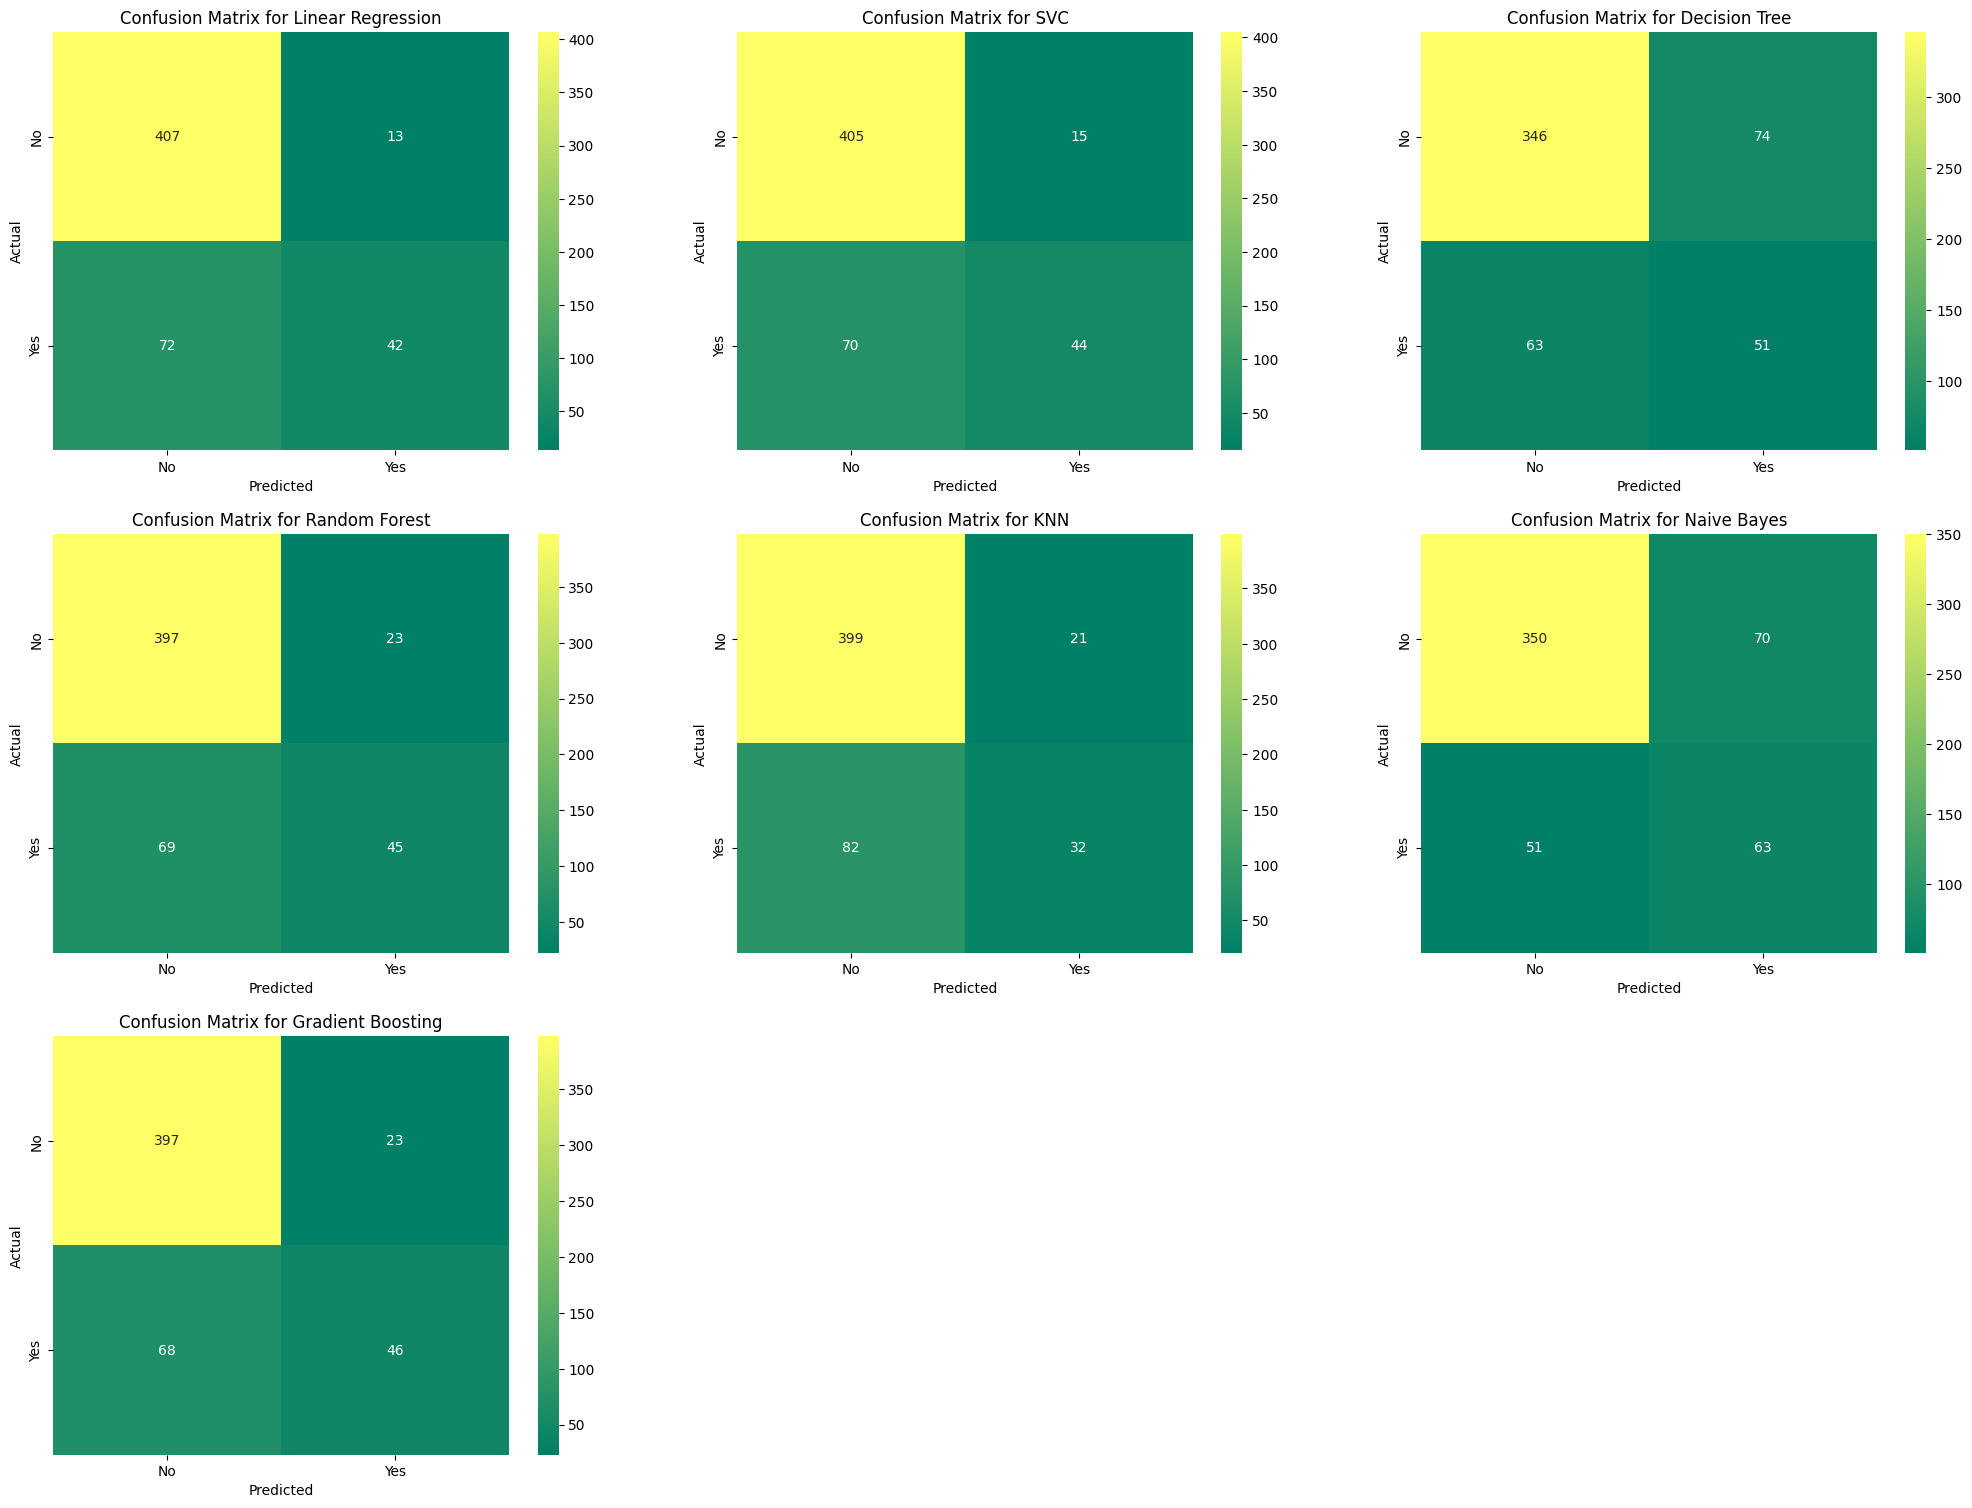

In [63]:
# ploting confusion matrix tanpa hyperparameter
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

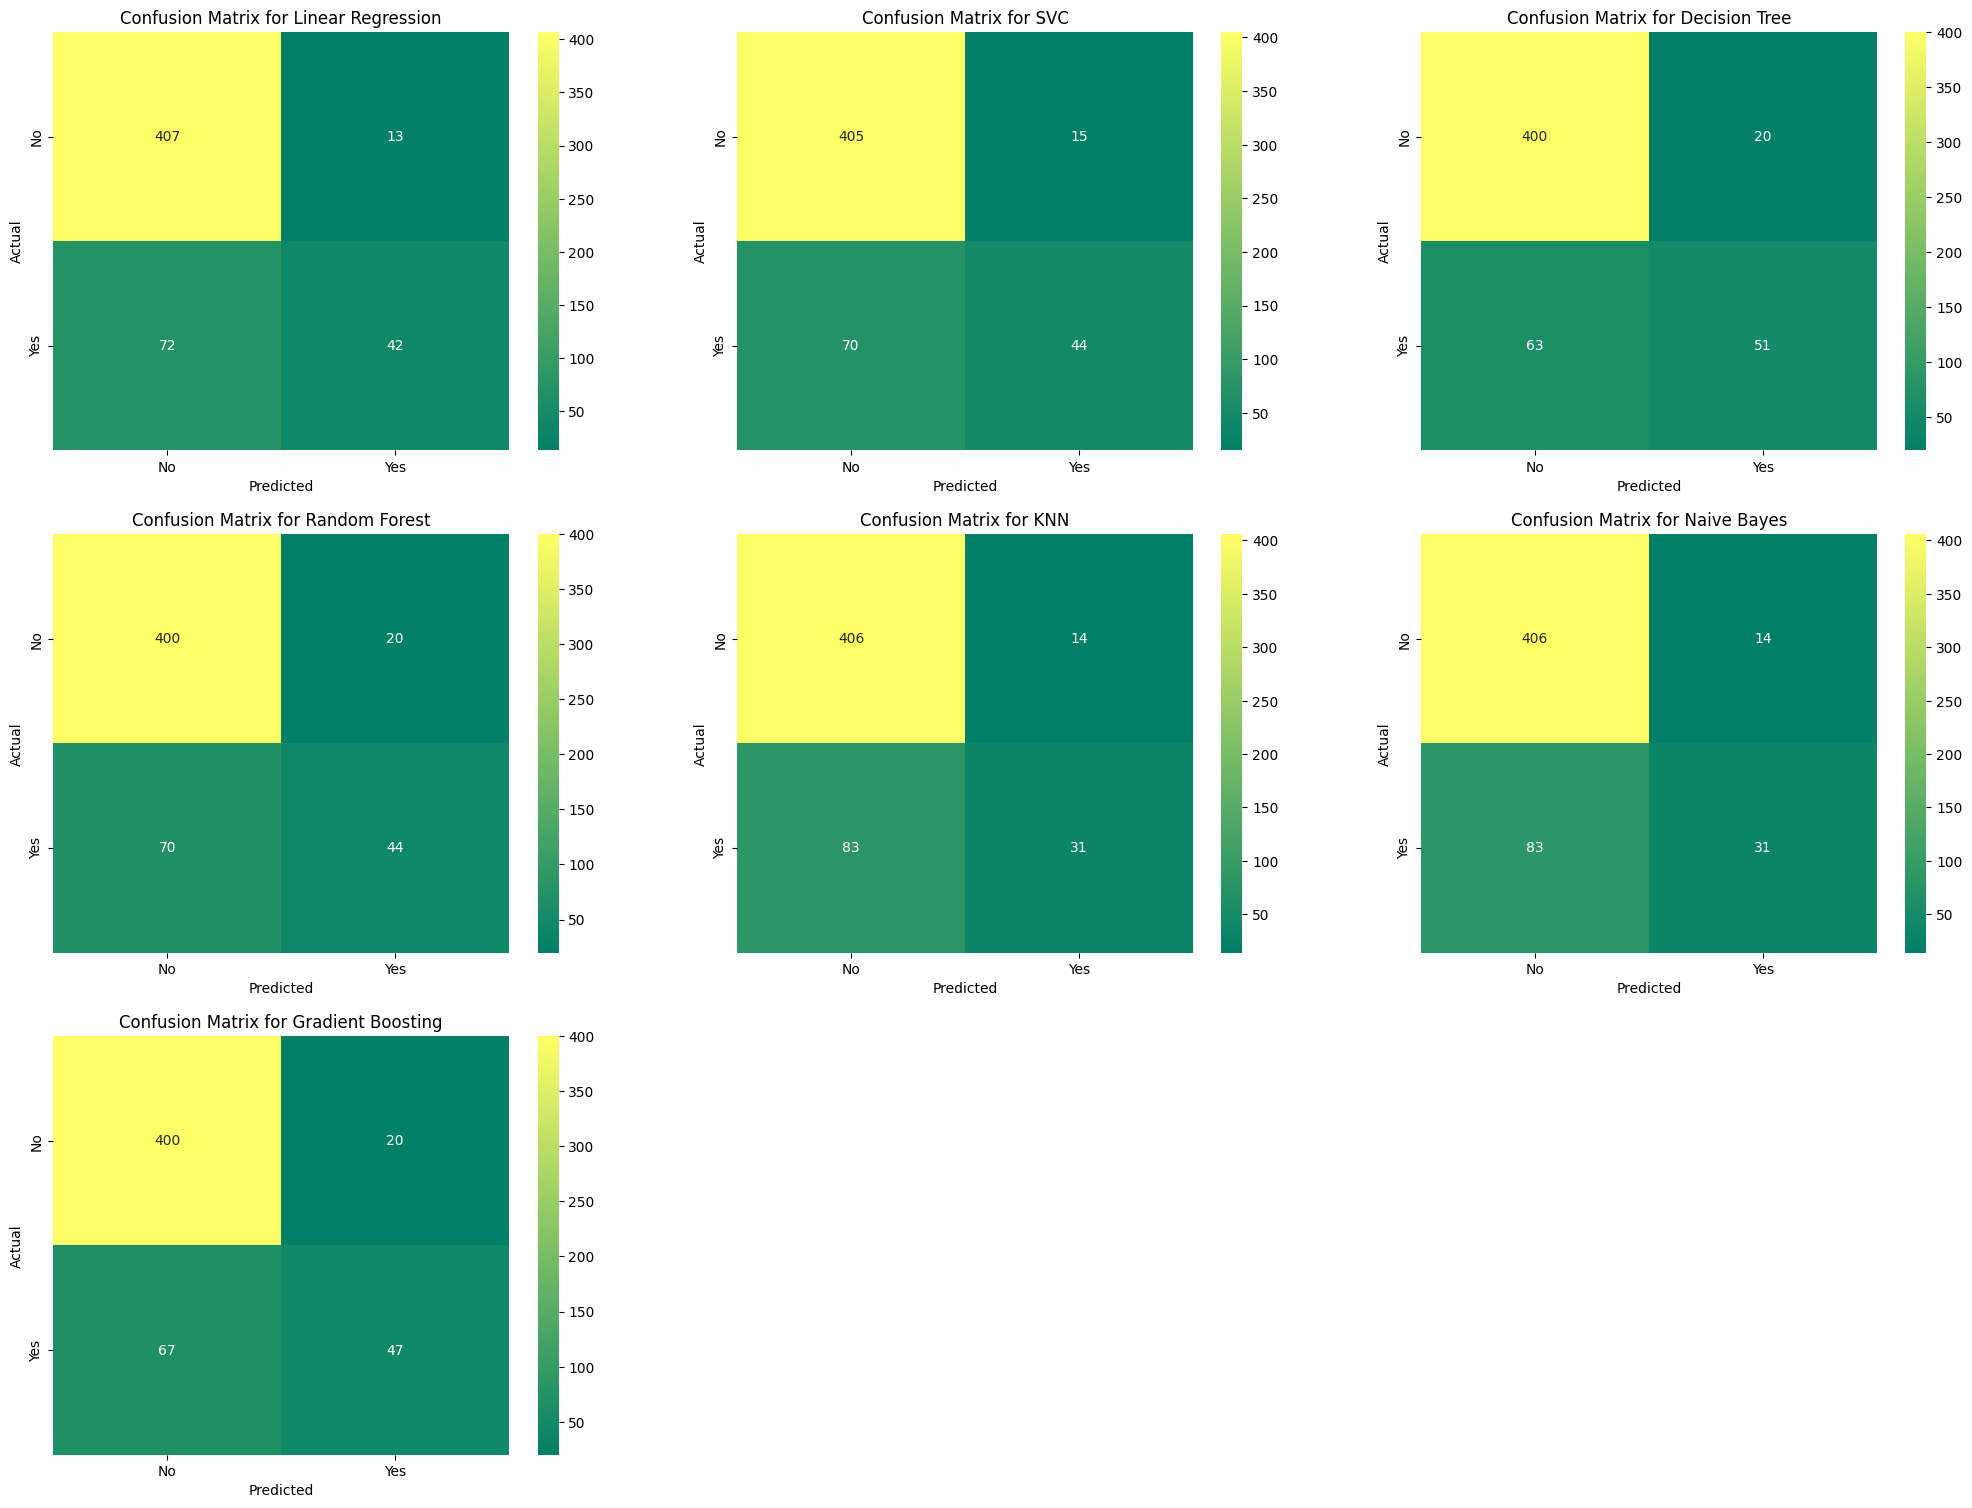

In [64]:
# ploting confusion matrix dengan hyperparameter
plt.figure(figsize=(25, 25))
for i in range(len(confusions2)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions2[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

Terlihat juga pada confusion matrix perbedaan antara base model dan model dengan menggunakan hyperparameter, model `Decision Tree`, `KNN`, `Naive Bayes` dan `Gradient Boosting` menampilkan hasil yang berbeda

### ROC AUC

In [65]:
# Menghitung False Positive Rate dan True Positive Rate menggunakan roc_curve()
logistic_fpr_val, logistic_tpr_val, logistic_thresholds_val = roc_curve(y_val, best_logistic.predict(X_val))
svc_fpr_val, svc_tpr_val, svc_thresholds_val = roc_curve(y_val, best_svc.predict(X_val))
tree_fpr_val, tree_tpr_val, tree_thresholds_val = roc_curve(y_val, best_tree.predict(X_val))
forest_fpr_val, forest_tpr_val, forest_thresholds_val = roc_curve(y_val, best_rf.predict(X_val))
knn_fpr_val, knn_tpr_val, knn_thresholds_val = roc_curve(y_val, best_knn.predict(X_val))
naive_fpr_val, naive_tpr_val, naive_thresholds_val = roc_curve(y_val, best_bayes.predict(X_val))
gboost_fpr_val, gboost_tpr_val, gboost_thresholds_val = roc_curve(y_val, best_gboost.predict(X_val))

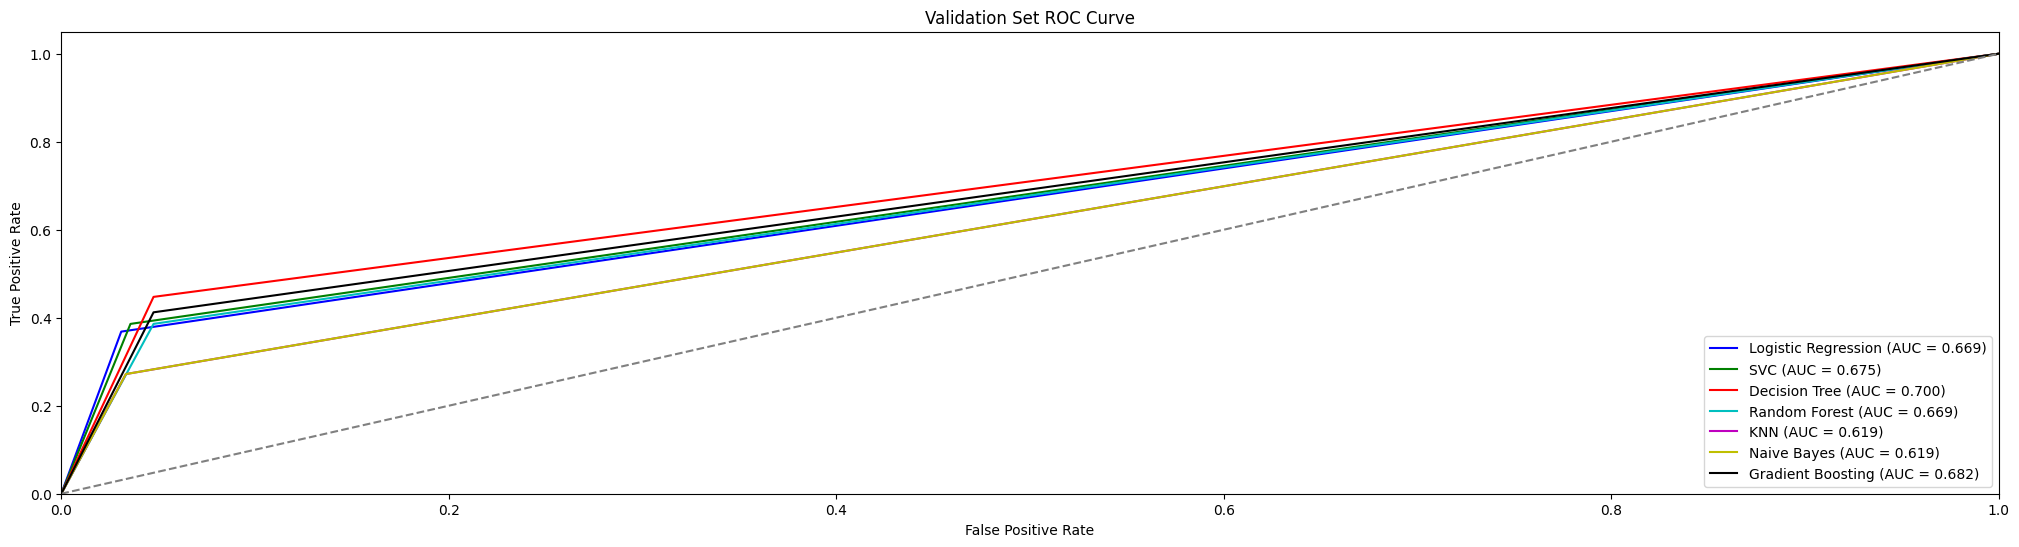

In [66]:
# Ploting roc_auc
plt.figure(figsize=(25, 6))
plt.plot(logistic_fpr_val, logistic_tpr_val, color='b', label=f'Logistic Regression (AUC = {roc_auc_score(y_val, best_logistic.predict(X_val)):.3f})')
plt.plot(svc_fpr_val, svc_tpr_val, color='g', label=f'SVC (AUC = {roc_auc_score(y_val, best_svc.predict(X_val)):.3f})')
plt.plot(tree_fpr_val, tree_tpr_val, color='r', label=f'Decision Tree (AUC = {roc_auc_score(y_val, best_tree.predict(X_val)):.3f})')
plt.plot(forest_fpr_val, forest_tpr_val, color='c', label=f'Random Forest (AUC = {roc_auc_score(y_val, best_rf.predict(X_val)):.3f})')
plt.plot(knn_fpr_val, knn_tpr_val, color='m', label=f'KNN (AUC = {roc_auc_score(y_val, best_knn.predict(X_val)):.3f})')
plt.plot(naive_fpr_val, naive_tpr_val, color='y', label=f'Naive Bayes (AUC = {roc_auc_score(y_val, best_bayes.predict(X_val)):.3f})')
plt.plot(gboost_fpr_val, gboost_tpr_val, color='k', label=f'Gradient Boosting (AUC = {roc_auc_score(y_val, best_gboost.predict(X_val)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
# Membuat dataframe model_eval
model_eval = pd.DataFrame(columns=['model', 'training_score', 'validation_score', 'macro_precision','macro_f1-score', 'roc_auc_score'])

Membuat dataframe dengan nama model_eval yg berisi kolom model, training_score, validation_score, macro_precision, roc_auc_score untuk meyimpan score pada setiap model

In [68]:
model_eval.loc[0] = ['Logistic Regression', round(best_logistic.score(X_train, y_train), 3), round(best_logistic.score(X_val, y_val), 3), \
                       round(precision_score(y_val, best_logistic.predict(X_val), average='macro'), 3), round(f1_score(y_val, best_logistic.predict(X_val)), 3), round(roc_auc_score(y_val, best_logistic.predict(X_val)), 3)]
model_eval.loc[1] = ['SVC', round(best_svc.score(X_train, y_train), 3), round(best_svc.score(X_val, y_val), 3), \
                       round(precision_score(y_val, best_svc.predict(X_val), average='macro'), 3), round(f1_score(y_val, best_svc.predict(X_val)), 3), round(roc_auc_score(y_val, best_svc.predict(X_val)), 3)]
model_eval.loc[2] = ['Decision Tree', round(best_tree.score(X_train, y_train), 3), round(best_tree.score(X_val, y_val), 3), \
                       round(precision_score(y_val, best_tree.predict(X_val), average='macro'), 3), round(f1_score(y_val, best_tree.predict(X_val)), 3), round(roc_auc_score(y_val, best_tree.predict(X_val)), 3)]
model_eval.loc[3] = ['Random rf', round(best_rf.score(X_train, y_train), 3), round(best_rf.score(X_val, y_val), 3), \
                       round(precision_score(y_val, best_rf.predict(X_val), average='macro'), 3), round(f1_score(y_val, best_rf.predict(X_val)), 3), round(roc_auc_score(y_val, best_rf.predict(X_val)), 3)]
model_eval.loc[4] = ['KNN', round(best_knn.score(X_train, y_train), 3), round(best_knn.score(X_val, y_val), 3), \
                       round(precision_score(y_val, best_knn.predict(X_val), average='macro'), 3), round(f1_score(y_val, best_knn.predict(X_val)), 3), round(roc_auc_score(y_val, best_knn.predict(X_val)), 3)]
model_eval.loc[5] = ['Naive Bayes', round(best_bayes.score(X_train, y_train), 3), round(best_bayes.score(X_val, y_val), 3), \
                       round(precision_score(y_val, best_bayes.predict(X_val), average='macro'), 3), round(f1_score(y_val, best_bayes.predict(X_val)), 3), round(roc_auc_score(y_val, best_bayes.predict(X_val)), 3)]
model_eval.loc[6] = ['Gradient Boosting', round(best_gboost.score(X_train, y_train), 3), round(best_gboost.score(X_val, y_val), 3), \
                       round(precision_score(y_val, best_gboost.predict(X_val), average='macro'), 3), round(f1_score(y_val, best_gboost.predict(X_val)), 3), round(roc_auc_score(y_val, best_gboost.predict(X_val)), 3)]

mengisi dataframe dengan score dari setiap model

In [69]:
model_eval.sort_values(by='roc_auc_score', ascending=False)

,model,training_score,validation_score,macro_precision,macro_f1-score,roc_auc_score
2,Decision Tree,0.844,0.845,0.791,0.551,0.700
6,Gradient Boosting,0.878,0.837,0.779,0.519,0.682
1,SVC,0.850,0.841,0.799,0.509,0.675
0,Logistic Regression,0.829,0.841,0.807,0.497,0.669
3,Random rf,1.000,0.831,0.769,0.494,0.669
4,KNN,0.834,0.818,0.760,0.390,0.619
5,Naive Bayes,0.822,0.818,0.760,0.390,0.619


data diatas menampilkan score dari setiap model

### Model Analysis

Dari hasil evaluasi semua model dapat diketahui model `Decision tree` dan `Logistic Regression` mengalami sedikit underfitting karena mendapatkan nilai training score lebih kecil dari validation score dan sisanya mengalami overfitting, namun didapatkan 3 model dengan performance terbaik yaitu `Decision Tree`, `Gradient Boosting` dan `SVC`, dengan Decision tree mendapatkan rata rata precision 0.791, dan roc_auc score 0.700, Gradient Boosting mendapatkan rata rata precision 0.779, dan roc_auc score 0.682 dan SVC mendapatkan rata rata precision 0.799 dan roc_auc score 0.675.

Jika dilihat dari confusion matrix dari ketiga model tersebut, Decision Tree memiliki False Positif terkecil dibandingkan dengan 2 model lainnya dan SVC memiliki False Negatif terkecil dan True Negatif terbesar dari 2 model lainnya dan

## Model Inference

In [70]:
df_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2002,310000,2,1,2,26,-2,-2,-2,-2,-2,-2,297,0,0,0,0,0,0,0,0,0,0,0,0
952,160000,2,2,1,28,0,0,0,0,0,0,54232,55456,56625,57757,59424,60631,2100,2100,2500,3000,2200,2200,0
2385,360000,2,1,1,28,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
1599,170000,2,2,2,26,2,0,0,0,2,0,111170,113387,115807,119857,117100,118079,4065,5727,7500,2000,4200,5000,1
1753,80000,2,2,1,30,2,2,-2,-2,-1,-1,15304,0,0,0,1005,5,0,0,0,1005,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,50000,2,2,1,24,1,2,0,0,2,2,12744,12243,16215,20490,19990,0,0,4200,4700,0,0,3390,1
2768,150000,2,1,1,58,-1,-1,-1,-1,-1,-1,1657,2277,4049,1665,559,0,2277,4066,1665,559,0,663,0
1591,30000,2,2,2,25,2,0,0,0,0,0,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1
2930,180000,2,2,2,29,-1,-1,-2,-2,-2,-2,4184,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
# Feature selecting
X_test = df_test.drop(['default_payment_next_month'], axis=1) # Feature
y_test = df_test['default_payment_next_month'] # Target

Prediksi dari setiap model akan langsung dikonversi ke bentuk dataframe yang nanti di gabungkan dengan kolom default_payment_next_month dari testing set menjadi dataframe pred dengan kolom berikut:

- `Actual` adalah nilai sebenarnya
- `Tree` adalah hasil prediksi dari model Decision Tree
- `GB` adalah hasil prediksi dari model Gradient Boosting
- `SVC` adalah hasil prediksi dari model Support Vector Classifier

model yang digunakan adalah model yang menggunakan hyperparameter terbaik dari setiap model

In [72]:
pred_tree = pd.DataFrame(best_svc.predict(X_test))
pred_svc = pd.DataFrame(best_tree.predict(X_test))
pred_gboost = pd.DataFrame(best_gboost.predict(X_test))

pred = pd.concat([df_test['default_payment_next_month'].reset_index(drop=True), pred_tree, pred_gboost, pred_svc], axis=1)
pred.columns = ['Actual', 'Tree', 'GB', 'SVC']

pred[pred.Actual == 1].head(20)

,Actual,Tree,GB,SVC
3,1,1,1,1
5,1,0,1,1
6,1,0,0,0
19,1,0,0,1
21,1,0,1,1
24,1,1,1,1
26,1,1,1,1
32,1,1,1,1
40,1,1,1,1
48,1,1,0,0


## Pengambilan Kesimpulan

Kesimpulan yang dapat diambil dari EDA dan pemodelan:

Dataset yang digunakan adalah dataset credit_card_default yang berkaitan dengan kegagalan dari seorang debitur (pemegang kartu kredit) dalam membayar tagihan kartu kreditnya sesuai dengan jadwal yang telah ditentukan. Credit card default payment terjadi ketika seorang debitur tidak dapat atau tidak mau membayar tagihannya dalam waktu yang telah ditentukan, biasanya selama beberapa bulan. Ini dapat menyebabkan kerugian finansial bagi bank atau perusahaan kartu kredit, pada dataset ini nasabah yang gagal bayar memiliki data sebanyak 21,4% dan bisa bayar sebanyak 78,6%, kebanyakan nasabah yang menggunakan credit card ini memiliki level edukasi tinkat universitas sebanyak 1400 dan graduate school sebanyak 1038, nasabah dengan gender male sebanyak 21.4% dan female 78.6%.

Karena yang diprediksi adalah nasabah yang mengalami gagal bayar pinjaman maka ditentukan label 1 atau yes (positif) dan label 0 atau no (negatif), dalam analisis ini False Positif akan sangat berbahaya dibandingkan dengan False Negatif karena ketika nasabah gagal bayar tetapi terprediksi bisa bayar maka pihak bank akan mengalami kerugian, beda hal nya jika ketika nasabah bisa membayar tetapi terprediksi gagal bayar mungkin hanya menyebabkan kesalahpahaman antara bank dan nasabah, sehingga pada analisis ini difokuskan pada nilai precision karena ingin meminimalkan False Positif(jumlah data yang terprediksi false positif dikurangi).

Dari hasil pemodelan didapatkan 3 model dengan performance terbaik berdasarkan ROC AUC score yaitu `Decision Tree`, `Gradient Boosting`, `SVC` dan model model tersebut digunakan pada model inference, hasil yang didapatkan pada prediksi model inference dengan menampilkan 20 data masih kurang bagus karena hasil dari data test pada model inference menghasilkan kurang lebih 50% data yang terprediksi tepat dari masing masing model, ini bisa disebabkan karena data yang digunakan memiliki ketidak seimbangan data atau imbalance.

Impovment yang bisa diterapkan pada project ini adalah dengan menggunakan hyperparameter yang lebih memfokuskan untuk meningkatkan performance pada precision atau menambah proses pada data seperti melakukan imbalance handling.

### Answer

1. Apa yang dimaksud dengan `criterion` pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !


Criterion adalah sebuah parameter yang digunakan dalam pembuatan decision tree untuk menentukan bagaimana suatu node dibagi menjadi sub-node. Ada beberapa jenis criterion yang dapat digunakan, di antaranya adalah Gini index dan information gain. Gini index digunakan untuk mengukur puretas suatu node, sedangkan information gain digunakan untuk mengukur seberapa banyak informasi yang dapat diperoleh dari suatu pembagian node.

2. Jelaskan apa yang dimaksud dengan `pruning` pada Tree-based model (alasan, definisi, jenis, dll) !


Pruning adalah proses untuk memotong (menghapus) cabang-cabang dari decision tree yang dianggap tidak relevan atau tidak berguna. Tujuan dari pruning adalah untuk mengurangi overfitting pada model decision tree. Overfitting terjadi ketika model decision tree terlalu kompleks dan menangkap noise dari data yang digunakan untuk pelatihan, sehingga menurunkan performa model pada data baru. Pruning dapat dilakukan dengan beberapa metode, di antaranya adalah reduced error pruning, cost complexity pruning, dan minimum description length pruning.

3. Bagaimana cara memilih `K` yang optimal pada KNN ?

Metode cross-validation adalah metode yang paling umum digunakan karena dapat mengukur performa model dengan menggunakan beberapa subset data yang berbeda, sehingga hasilnya lebih stabil dibandingkan dengan metode lain. Namun, metode ini cenderung memerlukan waktu yang cukup lama untuk dijalankan jika data yang digunakan cukup besar.

4. Jelaskan apa yang dimaksud dengan `Cross Validation` !

Cross validation adalah metode untuk mengevaluasi kinerja dari suatu model dengan menggunakan data yang berbeda sebagai data train dan data validasi.

5. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

- Accuracy 
  
accuracy mengukur seberapa baik model dapat memprediksi label yang benar dari data uji. Rumus untuk menghitung accuracy adalah jumlah prediksi yang benar dibagi dengan jumlah total prediksi.
- Precision
  
Precision yang tinggi berarti bahwa model memiliki false positive rate yang rendah, artinya ia dapat mengidentifikasi dengan benar sebagian besar dari instance yang di prediksi sebagai positif,
digunakan ketika hasil prediksi membutuhkan false positif yang kecil seperti pada project ini.
- Recall
  
Recall adalah metrik yang digunakan dalam laporan klasifikasi untuk mengevaluasi kinerja suatu model, terutama dalam masalah klasifikasi biner. Didefinisikan sebagai rasio antara jumlah true positive (TP) dengan jumlah true positive dan false negative (FN). Dengan kata lain, recall mengukur proporsi dari instance positif yang sebenarnya yang dikenali dengan benar oleh model, digunakan ketika prediksi membutuhkan false negatif yang kecil seperti pada dataset diabetes, ketika seseorang mengalami diabetes namun hasil prediksinya sehat.
- F1-Score
  
F1 Score adalah metrik yang menggabungkan precision dan recall untuk mengevaluasi kinerja suatu model